<a href="https://colab.research.google.com/github/dele22922/tarea3_feat_eng/blob/main/Tarea%20Semana%204_GRP4_vfinal3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidad del Valle de Guatemala y Millicom Tigo Guatemala**<br>
**Tarea Semana 3**<br>
Feature Engineering<br>
Josué Obregón PhD<br>
**Grupo 4**<br>
Victor De León<br>
Jaime García<br>


**Objetivo de la tarea:**<br>
Experimentación con feature transformation a variables numéricas y categóricas.
El objetivo de la tercera tarea de la clase es que los estudiantes utilicen los diferentes métodos de transformación de atributos aprendidos en clase sobre los datos que utilizarán para su proyecto final. Con esto se busca que los estudiantes se familiaricen con el uso de diferentes librerías aplicadas sobre datos reales, así como que ejerciten su capacidad de interpretar de forma crítica los resultados obtenidos.

En resumen, por ser nuestro proyecto sobre series de tiempo, tuvimos el desafío de entender lo que modelos o algoritmos de ML como Prophet y ARIMA requieren como un mejor input o features que ayude a que el modelo interprete mejor los datos que respaldan el comportamiento de un fenomeno en particular. 


En nuestro caso la serie de tiempo que data del 1 de nov 2022 al 11 de mayo 2023 nos muestra la variable númerica y objetivo de revenue (CANT) y otras variables predictoras como la variable númerica de tráfico (TRAFICO) y la variable categórica de FECHA y sus variables derivadas que mejor pueden soportar el comportamiento observado en el punto de venta PDV seleccionado (INTERNAC) en la venta de recargas dentro de lo que se conoce como PDV Externos.


Iniciaremos detallando como trabajamos la transformación de variables desde las variables más  relevantes y como se comportaron con los modelos de ARIMA y Prophet respecto de los ejercicios que realizamos variando o agregando alguna de ellas.


**Procedemos a declarar las librerias a utilizar en nuestra tarea:**

In [6]:
import warnings;
warnings.simplefilter('ignore')

In [7]:
import prophet
from prophet import Prophet

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Python


**Procedemos a leer nuestro dataset de series de tiempo, usamos nuestro dataset del proyecto final. El mismo contiene una serie de tiempo donde se encuentran las ventas de recargas y vastrix por punto de venta:**


In [9]:
df = pd.read_csv('REC5.csv',parse_dates=True)
df_test = pd.read_csv('REC_TEST.csv',parse_dates=True)
df.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
0,01-Nov-22,Internac,1,13997,1157375,155
1,01-Nov-22,direct1,2,9666,168465,163
2,01-Nov-22,dist1,3,9172,137949,164
3,01-Nov-22,digi1,4,3494,83306,154
4,01-Nov-22,online2,6,3251,80198,100


In [10]:
df_test.head(25)

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
0,12-May-23,Internac,1,24061,1845564,243
1,13-May-23,Internac,1,22409,1847190,223
2,14-May-23,Internac,1,25279,2102730,254
3,15-May-23,Internac,1,25494,1966406,216
4,16-May-23,Internac,1,14933,1232895,248
5,17-May-23,Internac,1,14218,1172065,222
6,18-May-23,Internac,1,13883,1147725,246
7,19-May-23,Internac,1,25321,1956711,216
8,20-May-23,Internac,1,23394,1938838,236
9,21-May-23,Internac,1,26234,2196942,217


Validamos que nuestro dataset fue cargado exitosamente:

In [11]:
df.head(5)

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
0,01-Nov-22,Internac,1,13997,1157375,155
1,01-Nov-22,direct1,2,9666,168465,163
2,01-Nov-22,dist1,3,9172,137949,164
3,01-Nov-22,digi1,4,3494,83306,154
4,01-Nov-22,online2,6,3251,80198,100


Realizamos una inspección del dataset cargado exitosamente:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    5184 non-null   object
 1   NOMBRE   5184 non-null   object
 2   CODIGO   5184 non-null   int64 
 3   TRAFICO  5184 non-null   int64 
 4   CANT     5184 non-null   int64 
 5   DELAY    5184 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 243.1+ KB


## **Conociendo cada feature númerica**

In [13]:
df.describe()

,CODIGO,TRAFICO,CANT,DELAY
count,5184.000000,5184.000000,5.184000e+03,5184.000000
mean,25.509452,2469.948688,9.961918e+04,151.383295
std,35.411017,4740.627836,3.076218e+05,53.355953
min,1.000000,101.000000,5.700000e+02,0.000000
25%,7.000000,143.000000,2.079750e+03,129.000000
50%,14.000000,522.000000,1.179800e+04,155.000000
75%,26.000000,2039.500000,6.013875e+04,170.250000
max,167.000000,27822.000000,2.272792e+06,1480.000000


## **CODIGO** es una feature prescindible que no aporta al modelo de predicción.<br>
## **TRAFICO** indica la cantidad de transacciones diarias de cada PDV.<br>
## **CANT** es la feature que denota revenue diario vendido. <br>
## **DELAY** es una feature en el dataset de orígen técnico que contiene el Average del delay en milisegundos del total de transacciones diarias.


## **Conociendo cada feature CATEGORICA**

In [14]:
df['NOMBRE'].unique()

array(['Internac', 'direct1', 'dist1', 'digi1', 'online2', 'online1',
       'Internac_Z', 'direc2', 'wal1', 'direct3', 'agencia1', 'veri1',
       'dist3', 'comer1', 'veri2', 'dist2', 'dist5', 'dist6', 'tienda1',
       'comer3', 'cel28', 'internac2', 'tienda19', 'cel1', 'tienda3',
       'tienda33', 'cel2', 'comer16', 'tienda4', 'tienda8', 'tienda18',
       'cel8', 'comer2', 'comer7', 'tienda5', 'tienda7', 'tienda6',
       'tienda2', 'cel3', 'tienda54', 'comer10', 'cel7', 'tienda53',
       'particular2', 'dist8', 'particular3', 'tienda16', 'tienda10',
       'cel5', 'tienda17', 'cel4', 'comer4', 'particular1', 'tienda20',
       'particular4', 'tienda44', 'comer8', 'comer14', 'tienda14', 'cel6',
       'particular6', 'comer15', 'dist4', 'internac4', 'comer11',
       'tienda12', 'tienda51', 'tienda9', 'tienda15', 'comer17',
       'tienda27', 'tienda29', 'internac3', 'particular7', 'cel26',
       'tienda36', 'comer27', 'particular8', 'tienda22', 'cel17',
       'tienda45', 'tiend

In [15]:
df['NOMBRE'].nunique()

165

In [16]:
df['FECHA'].nunique()

214

In [17]:
df['FECHA'].head()

0    01-Nov-22
1    01-Nov-22
2    01-Nov-22
3    01-Nov-22
4    01-Nov-22
Name: FECHA, dtype: object

In [18]:
df['FECHA'].tail()

5179    29-May-23
5180    30-May-23
5181    31-May-23
5182    01-Jun-23
5183    02-Jun-23
Name: FECHA, dtype: object

# La variable fecha consta de 192 días, partiendo del 1 de noviembre 2022 al 11 de Mayo 2023.

## Aparte de **FECHA**, **NOMBRE** del PDV es la feature categórica más importante del dataset, ya que en ella se contiene los diversos PDV. A continuación mostraremos el top 10 de PDV y entre ellos destacaremos el top 1 del período observado para dedicarnos a explorar su comportamiento y con el cual haremos todo el proceso de feature engineering y modelo de predicción.

**Ya que nuestro dataset tiene la información de varios puntos de venta procedemos a identificar cuales de ellos tiene la mayor cantidad de Tráfico, con esto identificamos que punto de venta utilizar en la creacion de nuevos feature.**

In [19]:
df.groupby('NOMBRE')['TRAFICO'].sum().sort_values(ascending=False).head(10)

NOMBRE
Internac      3903356
direct1       2896647
dist1         1726755
digi1          834828
Internac_Z     525164
online1        497403
online2        497387
direc2         417234
comer1         241687
wal1           235881
Name: TRAFICO, dtype: int64

## **Internac** es el PDV top 1.

Dado que nuestro objetivo es proyectar comportamiento para fijar umbrales de máximos y mínimos esperados en el PDV con mayor tráfico (con un intervalos de confianza del 0.95), nos basaremos en Internac para realizar todo el forecast de predicción tomando en cuenta principalmente el comportamiento estacional semanal y el tipo de día o día de la semana para ello. Se tomo el dato diario con fines de desarrollo del proyecto, pero es muy probable que recurramos en el futuro a una resolución por hora para desarrollar ya una implementación real de monitoreo.

In [20]:
df1=df
df1 = df1[df.NOMBRE=='Internac'][['FECHA','NOMBRE','CODIGO','TRAFICO','CANT','DELAY']] # let's focus on Internac
df1

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
0,01-Nov-22,Internac,1,13997,1157375,155
24,02-Nov-22,Internac,1,12754,1062818,187
49,03-Nov-22,Internac,1,12441,1040217,165
74,04-Nov-22,Internac,1,23045,1800050,145
100,05-Nov-22,Internac,1,21942,1830014,162
...,...,...,...,...,...,...
5179,29-May-23,Internac,1,27822,2163788,214
5180,30-May-23,Internac,1,15773,1304342,231
5181,31-May-23,Internac,1,14054,1164325,229
5182,01-Jun-23,Internac,1,13565,1134246,220


#**Se agregan dos nuevas variables de la variable TRAFICO**

In [21]:
df1 ['traff_x1000']= df1.TRAFICO/1000 # transform 
df1 ['qty_x1000']= df1.CANT/1000 # transform

In [22]:
df_test1 = df_test
df_test1 = df_test1[df_test1.NOMBRE=='Internac'][['FECHA','NOMBRE','CODIGO','TRAFICO','CANT','DELAY']] # let's focus on Internac
df_test1 ['traff_x1000']= df_test1.TRAFICO/1000 # transform 
df_test1 ['qty_x1000']= df_test1.CANT/1000 # transform

df_test1.head(5)

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000
0,12-May-23,Internac,1,24061,1845564,243,24.061,1845.564
1,13-May-23,Internac,1,22409,1847190,223,22.409,1847.190
2,14-May-23,Internac,1,25279,2102730,254,25.279,2102.730
3,15-May-23,Internac,1,25494,1966406,216,25.494,1966.406
4,16-May-23,Internac,1,14933,1232895,248,14.933,1232.895


In [23]:
import logging 
logging.getLogger().setLevel(logging.CRITICAL) #Previene matplotlib info en categoricas x-axis, removible

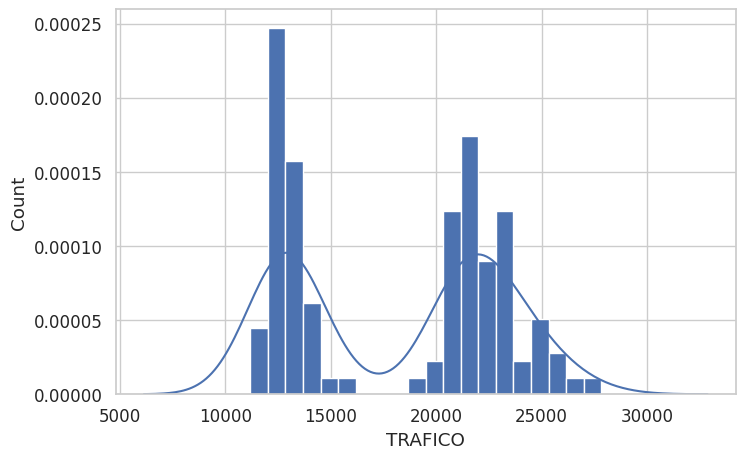

In [24]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df1['TRAFICO'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='TRAFICO', ylabel='Count');

**Distribución de la variable TRAFICO. Se observa comportamiento bimodal para el tráfico diario o sea la cantidad de transacciones de recargas diarias para el PDV Internac.**

In [25]:
numerical = [
  'TRAFICO', 'CANT', 'DELAY']
categorical = [
  'FECHA', 'NOMBRE']

df1 = df1[numerical + categorical]
df1.shape

(214, 5)

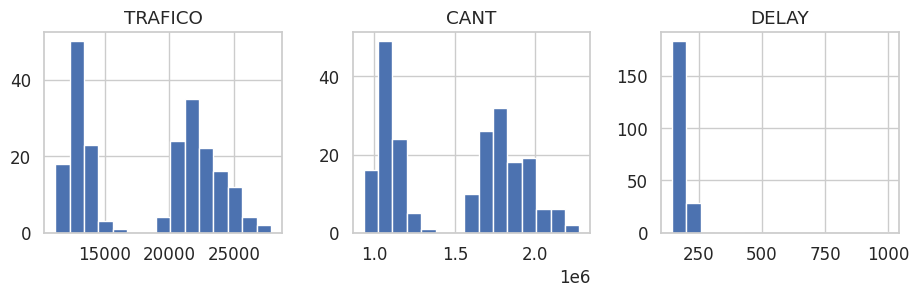

In [26]:
df1[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

# En el análisis del histograma de las variables númericas observamos que dado que tanto el feature TRAFICO como CANT tiene similar comportamiento podriamos deducir a priori que se corresponden directa y proporcionalmente. Sin embargo vamos a realizar analisis de correlación para fundamentar estadísticamente.<br> DELAY muestra valores que no sobrepasan los 250 ms en la muestra, probablemente revele outliers que necesite removerse antes de cualquier modelado.

In [27]:
df1.describe()

,TRAFICO,CANT,DELAY
count,214.000000,2.140000e+02,214.000000
mean,18239.981308,1.497905e+06,176.813084
std,4917.218530,3.881865e+05,64.244637
min,11192.000000,9.331550e+05,143.000000
25%,12877.750000,1.081280e+06,154.000000
50%,20672.000000,1.651944e+06,163.000000
75%,22339.250000,1.808998e+06,180.750000
max,27822.000000,2.272792e+06,998.000000


#**Analizando relaciones entre variables numericas**

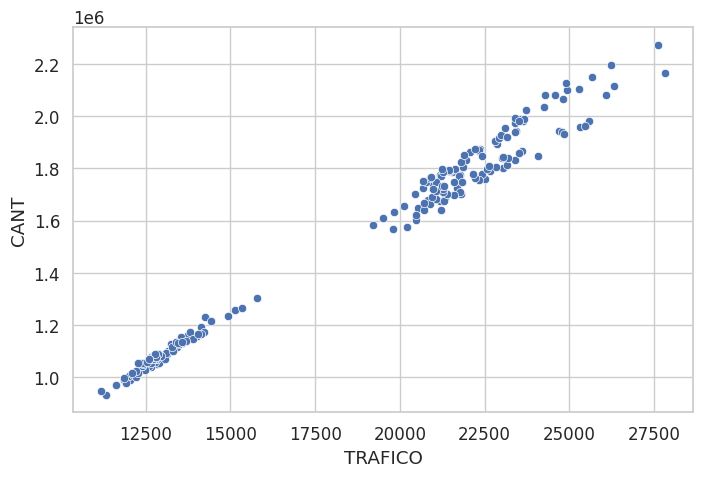

In [28]:

sns.scatterplot(x=df1['TRAFICO'], y=df1['CANT']);

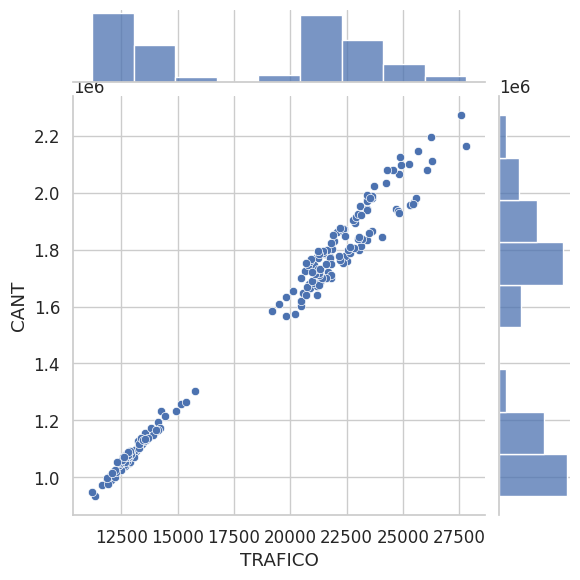

In [29]:

sns.jointplot(x=df1['TRAFICO'], y=df1['CANT']);

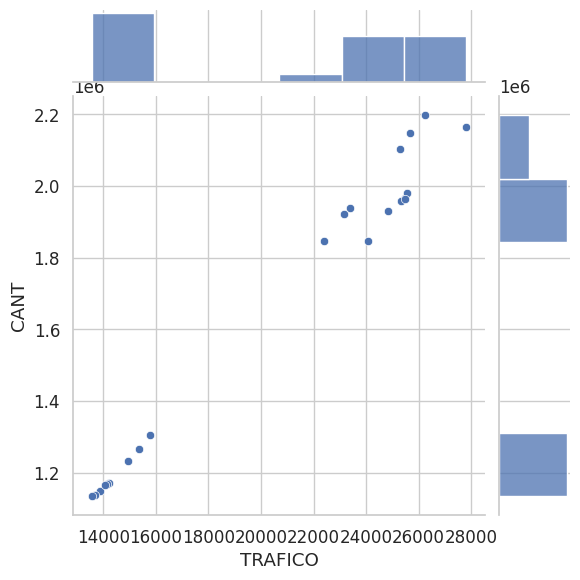

In [30]:
sns.jointplot(x=df_test['TRAFICO'], y=df_test['CANT']);

Resultado preliminar en la muestra de test

#**Correlación de Pearson entre variables TRAFICO y CANTIDAD 0.9944**

In [31]:
from scipy.stats.stats import pearsonr
pearsonr(df1['TRAFICO'],df1['CANT'])

PearsonRResult(statistic=0.9939044890308234, pvalue=5.255620671790104e-205)

###**El valor cercano a 1 en el coheficiente de correlación nos dice que hay una fuerte correlación entre ambas variables.**

In [32]:
pearsonr(df1['TRAFICO'],df1['DELAY'])

PearsonRResult(statistic=-0.10728981140175091, pvalue=0.11761986453649732)

**Escasa pero existente correlación negativa entre variable TRAFICO y DELAY**

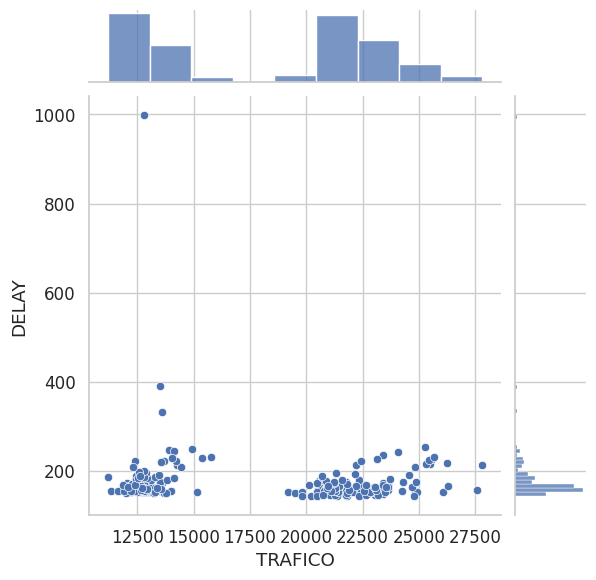

In [33]:

sns.jointplot(x=df1['TRAFICO'], y=df1['DELAY']);

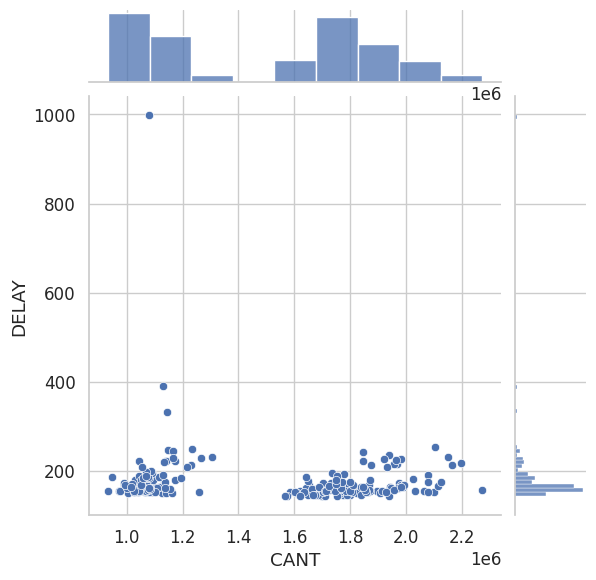

In [34]:
sns.jointplot(x=df1['CANT'], y=df1['DELAY']);

## **Analisis de variables categoricas**

Ya que adelante vamos a realizar la modelación de series de tiempo con Auto_ARIMA, procedemos a instalar la libreria correspondiente:

In [35]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.3 MB/s eta 0:00:00


Importamos las librerias que nos servirán:

In [36]:
from ast import increment_lineno
import pandas as pd
import numpy as np

#Visualizacion de los datos

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

#Visualizamos todas las columnas
pd.set_option('display.max_columns',None)

Crearemos otro dataset nuevo, donde procederemos a crear nuestros nuevos features que utilizaremos en un modelo arima y otro de prophet:

In [37]:
df_arima=df #Tome el dataframe original

Revisamos que nuestro nuevo dataset haya sido cargado exitosamente:

In [38]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    5184 non-null   object
 1   NOMBRE   5184 non-null   object
 2   CODIGO   5184 non-null   int64 
 3   TRAFICO  5184 non-null   int64 
 4   CANT     5184 non-null   int64 
 5   DELAY    5184 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 243.1+ KB


**Creacion de Nuevos Features para nuestro dataset original para la variable númerica tráfico y cantidad:**

Vamos a enfocarnos en el punto de venta llamado Internac y procederemos a crear dos nuevos atributos. Uno para la variable predictora qty (también llamada CANT) que es la cantidad de dinero en ventas y también crearemos una para la variable tráfico (TRAFF)

In [39]:
df_arima = df_arima[df.NOMBRE=='Internac'][['FECHA','NOMBRE','CODIGO','TRAFICO','CANT','DELAY']] # let's focus on Internac
df_arima ['traff_x1000']= df_arima.TRAFICO/1000 # transform 
df_arima ['qty_x1000']= df_arima.CANT/1000 # transform

df_arima

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000
0,01-Nov-22,Internac,1,13997,1157375,155,13.997,1157.375
24,02-Nov-22,Internac,1,12754,1062818,187,12.754,1062.818
49,03-Nov-22,Internac,1,12441,1040217,165,12.441,1040.217
74,04-Nov-22,Internac,1,23045,1800050,145,23.045,1800.050
100,05-Nov-22,Internac,1,21942,1830014,162,21.942,1830.014
...,...,...,...,...,...,...,...,...
5179,29-May-23,Internac,1,27822,2163788,214,27.822,2163.788
5180,30-May-23,Internac,1,15773,1304342,231,15.773,1304.342
5181,31-May-23,Internac,1,14054,1164325,229,14.054,1164.325
5182,01-Jun-23,Internac,1,13565,1134246,220,13.565,1134.246


Corroboramos que estos dos nuevos atributos fueron creados exitosamente en el dataset:

In [40]:
df_arima.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000
0,01-Nov-22,Internac,1,13997,1157375,155,13.997,1157.375
24,02-Nov-22,Internac,1,12754,1062818,187,12.754,1062.818
49,03-Nov-22,Internac,1,12441,1040217,165,12.441,1040.217
74,04-Nov-22,Internac,1,23045,1800050,145,23.045,1800.050
100,05-Nov-22,Internac,1,21942,1830014,162,21.942,1830.014


**Ya que estamos usando una serie de tiempo, vamos a crear otros atributos utilizando las dos nuevas variables creadas en miles (traff y qty), utilizando tres ventanas de tiempo (3, 7 y 30 días)**

**Estas serían la transformación de las variables númericas.**

In [41]:
df_arima.reset_index(drop=True, inplace=True)
lag_features = ["traff_x1000", "qty_x1000"]
window1 = 1
window2 = 7
window3 = 28

In [42]:
df_rolled_1d = df_arima[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df_arima[lag_features].rolling(window=window2, min_periods=0)
df_rolled_28d = df_arima[lag_features].rolling(window=window3, min_periods=0)

Procedemos a crear 6 atributos para las 3 ventanas de tiempo, usando la media y la desviación estandar de las variables de predicción tales como Cantidad de ventas y Tráfico. 

In [43]:
df_mean_1d = df_rolled_1d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_28d = df_rolled_28d.mean().shift(1).reset_index()

df_std_1d = df_rolled_1d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_28d = df_rolled_28d.std().shift(1).reset_index()



In [44]:
for feature in lag_features:
  df_arima[f"{feature}_mean_lag{window1}"] = df_mean_1d[feature]
  df_arima[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
  df_arima[f"{feature}_mean_lag{window3}"] = df_mean_28d[feature]

  df_arima[f"{feature}_std_lag{window1}"] = df_std_1d[feature]
  df_arima[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
  df_arima[f"{feature}_std_lag{window3}"] = df_std_28d[feature]

df.fillna(df_arima.mean(), inplace=True)

In [45]:
df_arima_test1 = df_test1
df_arima_test1.reset_index(drop=True, inplace=True)
lag_features = ["traff_x1000", "qty_x1000"]
window1 = 3
window2 = 7
window3 = 30

In [46]:
df_rolled_3d_test = df_arima_test1[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d_test = df_arima_test1[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d_test = df_arima_test1[lag_features].rolling(window=window3, min_periods=0)

In [47]:
df_mean_3d_test = df_rolled_3d_test.mean().shift(1).reset_index()
df_mean_7d_test = df_rolled_7d_test.mean().shift(1).reset_index()
df_mean_30d_test = df_rolled_30d_test.mean().shift(1).reset_index()

df_std_3d_test = df_rolled_3d_test.std().shift(1).reset_index()
df_std_7d_test = df_rolled_7d_test.std().shift(1).reset_index()
df_std_30d_test = df_rolled_30d_test.std().shift(1).reset_index()


In [48]:
for feature in lag_features:
  df_arima_test1[f"{feature}_mean_lag{window1}"] = df_mean_3d_test[feature]
  df_arima_test1[f"{feature}_mean_lag{window2}"] = df_mean_7d_test[feature]
  df_arima_test1[f"{feature}_mean_lag{window3}"] = df_mean_30d_test[feature]

  df_arima_test1[f"{feature}_std_lag{window1}"] = df_std_3d_test[feature]
  df_arima_test1[f"{feature}_std_lag{window2}"] = df_std_7d_test[feature]
  df_arima_test1[f"{feature}_std_lag{window3}"] = df_std_30d_test[feature]

df.fillna(df_arima_test1.mean(), inplace=True)

Confirmamos que fueron creadas los nuevos features en el dataset original: 

In [49]:
df_arima.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28
0,01-Nov-22,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-Nov-22,Internac,1,12754,1062818,187,12.754,1062.818,13.997,13.99700,13.99700,NaN,NaN,NaN,1157.375,1157.375000,1157.375000,NaN,NaN,NaN
2,03-Nov-22,Internac,1,12441,1040217,165,12.441,1040.217,12.754,13.37550,13.37550,NaN,0.878934,0.878934,1062.818,1110.096500,1110.096500,NaN,66.861896,66.861896
3,04-Nov-22,Internac,1,23045,1800050,145,23.045,1800.050,12.441,13.06400,13.06400,NaN,0.823018,0.823018,1040.217,1086.803333,1086.803333,NaN,62.152807,62.152807
4,05-Nov-22,Internac,1,21942,1830014,162,21.942,1830.014,23.045,15.55925,15.55925,NaN,5.035540,5.035540,1800.050,1265.115000,1265.115000,NaN,360.215930,360.215930


In [50]:
df_arima.tail()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28
209,29-May-23,Internac,1,27822,2163788,214,27.822,2163.788,25.665,20.433714,19.517464,NaN,5.738175,5.319288,2148.438,1654.867714,1598.325179,NaN,441.794649,412.216882
210,30-May-23,Internac,1,15773,1304342,231,15.773,1304.342,27.822,20.755286,19.762464,NaN,6.124148,5.541621,2163.788,1680.988429,1614.092321,NaN,468.862772,425.368252
211,31-May-23,Internac,1,14054,1164325,229,14.054,1164.325,15.773,20.815571,19.816750,NaN,6.063862,5.492882,1304.342,1686.569000,1616.697357,NaN,463.289536,423.155372
212,01-Jun-23,Internac,1,13565,1134246,220,13.565,1134.246,14.054,20.805571,19.868643,NaN,6.076780,5.428676,1164.325,1686.170714,1620.034893,NaN,463.811441,419.039394
213,02-Jun-23,Internac,1,24831,1930555,208,24.831,1930.555,13.565,20.786714,19.914429,NaN,6.102665,5.367389,1134.246,1685.490714,1622.931500,NaN,464.749887,415.238691


**Procedemos ahora a crear nuevos features para una variable categórica tal como FECHA y poder obtener 5 variables nuevas:**

In [51]:
df_arima.FECHA = pd.to_datetime(df_arima.FECHA)

In [52]:
df_arima["year"] = df_arima.FECHA.dt.year
df_arima["months"] = df_arima.FECHA.dt.month
df_arima["week"] = df_arima.FECHA.dt.week
df_arima["day"] = df_arima.FECHA.dt.day
df_arima["day_of_week"] = df_arima.FECHA.dt.day_of_week

df_arima.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28,year,months,week,day,day_of_week
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,44,1,1
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.997,13.99700,13.99700,NaN,NaN,NaN,1157.375,1157.375000,1157.375000,NaN,NaN,NaN,2022,11,44,2,2
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,12.754,13.37550,13.37550,NaN,0.878934,0.878934,1062.818,1110.096500,1110.096500,NaN,66.861896,66.861896,2022,11,44,3,3
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,12.441,13.06400,13.06400,NaN,0.823018,0.823018,1040.217,1086.803333,1086.803333,NaN,62.152807,62.152807,2022,11,44,4,4
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,23.045,15.55925,15.55925,NaN,5.035540,5.035540,1800.050,1265.115000,1265.115000,NaN,360.215930,360.215930,2022,11,44,5,5


In [54]:
df_arima_test1.FECHA = pd.to_datetime(df_arima_test1.FECHA)

In [55]:
df_arima_test1["year"] = df_arima_test1.FECHA.dt.year
df_arima_test1["months"] = df_arima_test1.FECHA.dt.month
df_arima_test1["week"] = df_arima_test1.FECHA.dt.week
df_arima_test1["day"] = df_arima_test1.FECHA.dt.day
df_arima_test1["day_of_week"] = df_arima_test1.FECHA.dt.day_of_week

df_arima_test1.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week
0,2023-05-12,Internac,1,24061,1845564,243,24.061,1845.564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,5,19,12,4
1,2023-05-13,Internac,1,22409,1847190,223,22.409,1847.190,24.061000,24.061000,24.061000,NaN,NaN,NaN,1845.564000,1845.5640,1845.5640,NaN,NaN,NaN,2023,5,19,13,5
2,2023-05-14,Internac,1,25279,2102730,254,25.279,2102.730,23.235000,23.235000,23.235000,1.168140,1.168140,1.168140,1846.377000,1846.3770,1846.3770,1.149756,1.149756,1.149756,2023,5,19,14,6
3,2023-05-15,Internac,1,25494,1966406,216,25.494,1966.406,23.916333,23.916333,23.916333,1.440459,1.440459,1.440459,1931.828000,1931.8280,1931.8280,148.007706,148.007706,148.007706,2023,5,20,15,0
4,2023-05-16,Internac,1,14933,1232895,248,14.933,1232.895,24.394000,24.310750,24.310750,1.722418,1.416171,1.416171,1972.108667,1940.4725,1940.4725,127.865411,122.078241,122.078241,2023,5,20,16,1


Revisamos que fueron creadas todos los features para nuestro dataset y podemos observar su tipo:

In [56]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   FECHA                   214 non-null    datetime64[ns]
 1   NOMBRE                  214 non-null    object        
 2   CODIGO                  214 non-null    int64         
 3   TRAFICO                 214 non-null    int64         
 4   CANT                    214 non-null    int64         
 5   DELAY                   214 non-null    int64         
 6   traff_x1000             214 non-null    float64       
 7   qty_x1000               214 non-null    float64       
 8   traff_x1000_mean_lag1   213 non-null    float64       
 9   traff_x1000_mean_lag7   213 non-null    float64       
 10  traff_x1000_mean_lag28  213 non-null    float64       
 11  traff_x1000_std_lag1    0 non-null      float64       
 12  traff_x1000_std_lag7    212 non-null    float64   

In [ ]:
df_arima_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   FECHA                   22 non-null     datetime64[ns]
 1   NOMBRE                  22 non-null     object        
 2   CODIGO                  22 non-null     int64         
 3   TRAFICO                 22 non-null     int64         
 4   CANT                    22 non-null     int64         
 5   DELAY                   22 non-null     int64         
 6   traff_x1000             22 non-null     float64       
 7   qty_x1000               22 non-null     float64       
 8   traff_x1000_mean_lag3   21 non-null     float64       
 9   traff_x1000_mean_lag7   21 non-null     float64       
 10  traff_x1000_mean_lag30  21 non-null     float64       
 11  traff_x1000_std_lag3    20 non-null     float64       
 12  traff_x1000_std_lag7    20 non-null     float64     

Procedemos a crear una nuevo feature para identificar el dia de promoción:
Este fue considerado importante, porque pensamos que puede definir mejor la estacionalidad del comportamiento de nuestra variable objetivo cantidad de ventas (revenue).

In [57]:
df_arima['promo_dia'] = np.where(df_arima['day_of_week'] == 0 , 1, 0) | np.where(df_arima['day_of_week'] > 3 , 1, 0)
df_arima

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28,year,months,week,day,day_of_week,promo_dia
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,44,1,1,0
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.997,13.997000,13.997000,NaN,NaN,NaN,1157.375,1157.375000,1157.375000,NaN,NaN,NaN,2022,11,44,2,2,0
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,12.754,13.375500,13.375500,NaN,0.878934,0.878934,1062.818,1110.096500,1110.096500,NaN,66.861896,66.861896,2022,11,44,3,3,0
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,12.441,13.064000,13.064000,NaN,0.823018,0.823018,1040.217,1086.803333,1086.803333,NaN,62.152807,62.152807,2022,11,44,4,4,1
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,23.045,15.559250,15.559250,NaN,5.035540,5.035540,1800.050,1265.115000,1265.115000,NaN,360.215930,360.215930,2022,11,44,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2023-05-29,Internac,1,27822,2163788,214,27.822,2163.788,25.665,20.433714,19.517464,NaN,5.738175,5.319288,2148.438,1654.867714,1598.325179,NaN,441.794649,412.216882,2023,5,22,29,0,1
210,2023-05-30,Internac,1,15773,1304342,231,15.773,1304.342,27.822,20.755286,19.762464,NaN,6.124148,5.541621,2163.788,1680.988429,1614.092321,NaN,468.862772,425.368252,2023,5,22,30,1,0
211,2023-05-31,Internac,1,14054,1164325,229,14.054,1164.325,15.773,20.815571,19.816750,NaN,6.063862,5.492882,1304.342,1686.569000,1616.697357,NaN,463.289536,423.155372,2023,5,22,31,2,0
212,2023-06-01,Internac,1,13565,1134246,220,13.565,1134.246,14.054,20.805571,19.868643,NaN,6.076780,5.428676,1164.325,1686.170714,1620.034893,NaN,463.811441,419.039394,2023,6,22,1,3,0


In [ ]:
df_arima_test1['promo_dia'] = np.where(df_arima_test1['day_of_week'] == 0 , 1, 0) | np.where(df_arima_test1['day_of_week'] > 3 , 1, 0)
df_arima_test1

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week,promo_dia
0,2023-05-12,Internac,1,24061,1845564,243,24.061,1845.564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,5,19,12,4,1
1,2023-05-13,Internac,1,22409,1847190,223,22.409,1847.190,24.061000,24.061000,24.061000,NaN,NaN,NaN,1845.564000,1845.564000,1845.564000,NaN,NaN,NaN,2023,5,19,13,5,1
2,2023-05-14,Internac,1,25279,2102730,254,25.279,2102.730,23.235000,23.235000,23.235000,1.168140,1.168140,1.168140,1846.377000,1846.377000,1846.377000,1.149756,1.149756,1.149756,2023,5,19,14,6,1
3,2023-05-15,Internac,1,25494,1966406,216,25.494,1966.406,23.916333,23.916333,23.916333,1.440459,1.440459,1.440459,1931.828000,1931.828000,1931.828000,148.007706,148.007706,148.007706,2023,5,20,15,0,1
4,2023-05-16,Internac,1,14933,1232895,248,14.933,1232.895,24.394000,24.310750,24.310750,1.722418,1.416171,1.416171,1972.108667,1940.472500,1940.472500,127.865411,122.078241,122.078241,2023,5,20,16,1,0
5,2023-05-17,Internac,1,14218,1172065,222,14.218,1172.065,21.902000,22.435200,22.435200,6.036288,4.369507,4.369507,1767.343667,1798.957000,1798.957000,467.838211,333.632292,333.632292,2023,5,20,17,2,0
6,2023-05-18,Internac,1,13883,1147725,246,13.883,1147.725,18.215000,21.065667,21.065667,6.313928,5.150515,5.150515,1457.122000,1694.475000,1694.475000,442.100347,393.125088,393.125088,2023,5,20,18,3,0
7,2023-05-19,Internac,1,25321,1956711,216,25.321,1956.711,14.344667,20.039571,20.039571,0.536338,5.429236,5.429236,1184.228333,1616.367857,1616.367857,43.868465,414.118976,414.118976,2023,5,20,19,4,1
8,2023-05-20,Internac,1,23394,1938838,236,23.394,1938.838,17.807333,20.219571,20.699750,6.509182,5.602892,5.362121,1425.500333,1632.246000,1658.910750,460.202877,426.322439,401.838886,2023,5,20,20,5,1
9,2023-05-21,Internac,1,26234,2196942,217,26.234,2196.942,20.866000,20.360286,20.999111,6.123728,5.678897,5.095572,1681.091333,1645.338571,1690.013778,461.995233,435.335648,387.294157,2023,5,20,21,6,1


**Crearemos un dataset nuevo, donde buscamos tener fechas importantes que podemos observar en la serie de tiempo, tales como NAVIDAD y AÑO NUEVO y que esto nos sea de utilidad cuando utilicemos el modelo de predicción de serie tiempo llamado Prophet:**

In [58]:
NAVIDAD = pd.DataFrame({
    'holiday': 'Navidad',
    'ds':pd.to_datetime(['2022-12-25']),
    'lower_window': -1,
    'upper_window':0,
})

AÑONUEVO = pd.DataFrame({
    'holiday': 'Año Nuevo',
    'ds':pd.to_datetime(['2023-01-01']),
    'lower_window': -1,
    'upper_window':0,
})

DIACARIÑO = pd.DataFrame({
    'holiday': 'Dia Cariño',
    'ds':pd.to_datetime(['2023-02-14']),
    'lower_window': -1,
    'upper_window':0,
})

DIAMADRE = pd.DataFrame({
    'holiday': 'Dia Madre',
    'ds':pd.to_datetime(['2023-05-10']),
    'lower_window': -1,
    'upper_window':0,
})


holidays = pd.concat((NAVIDAD, AÑONUEVO, DIACARIÑO, DIAMADRE))

In [59]:
holidays

,holiday,ds,lower_window,upper_window
0,Navidad,2022-12-25,-1,0
0,Año Nuevo,2023-01-01,-1,0
0,Dia Cariño,2023-02-14,-1,0
0,Dia Madre,2023-05-10,-1,0


**Generamos nuestros datos de entrenamiento y validación que utilizaremos en nuestro modelo de ARIMA**


In [60]:
df_arima.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28,year,months,week,day,day_of_week,promo_dia
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,44,1,1,0
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.997,13.99700,13.99700,NaN,NaN,NaN,1157.375,1157.375000,1157.375000,NaN,NaN,NaN,2022,11,44,2,2,0
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,12.754,13.37550,13.37550,NaN,0.878934,0.878934,1062.818,1110.096500,1110.096500,NaN,66.861896,66.861896,2022,11,44,3,3,0
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,12.441,13.06400,13.06400,NaN,0.823018,0.823018,1040.217,1086.803333,1086.803333,NaN,62.152807,62.152807,2022,11,44,4,4,1
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,23.045,15.55925,15.55925,NaN,5.035540,5.035540,1800.050,1265.115000,1265.115000,NaN,360.215930,360.215930,2022,11,44,5,5,1


In [61]:
df_arima.tail()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28,year,months,week,day,day_of_week,promo_dia
209,2023-05-29,Internac,1,27822,2163788,214,27.822,2163.788,25.665,20.433714,19.517464,NaN,5.738175,5.319288,2148.438,1654.867714,1598.325179,NaN,441.794649,412.216882,2023,5,22,29,0,1
210,2023-05-30,Internac,1,15773,1304342,231,15.773,1304.342,27.822,20.755286,19.762464,NaN,6.124148,5.541621,2163.788,1680.988429,1614.092321,NaN,468.862772,425.368252,2023,5,22,30,1,0
211,2023-05-31,Internac,1,14054,1164325,229,14.054,1164.325,15.773,20.815571,19.816750,NaN,6.063862,5.492882,1304.342,1686.569000,1616.697357,NaN,463.289536,423.155372,2023,5,22,31,2,0
212,2023-06-01,Internac,1,13565,1134246,220,13.565,1134.246,14.054,20.805571,19.868643,NaN,6.076780,5.428676,1164.325,1686.170714,1620.034893,NaN,463.811441,419.039394,2023,6,22,1,3,0
213,2023-06-02,Internac,1,24831,1930555,208,24.831,1930.555,13.565,20.786714,19.914429,NaN,6.102665,5.367389,1134.246,1685.490714,1622.931500,NaN,464.749887,415.238691,2023,6,22,2,4,1


In [62]:
df_arima_train = df_arima.iloc[:len(df_arima)-52]
df_arima_valid = df_arima.iloc[162:len(df_arima)-22]
df_arima_test2 = df_arima.iloc[len(df_arima)-22:]


Procedemos a utilizar nuestros nuevos features creados, y definirlos como un features de datos exógenos que se utilizarán en el módelo de ARIMA:

In [63]:
exogenous_features = ["traff_x1000_mean_lag1","traff_x1000_mean_lag7","traff_x1000_mean_lag28",
                      "traff_x1000_std_lag1","traff_x1000_std_lag7","traff_x1000_std_lag28",
                      "qty_x1000_mean_lag1","qty_x1000_mean_lag7", "qty_x1000_mean_lag28",
                      "qty_x1000_std_lag1", "qty_x1000_std_lag7", "qty_x1000_std_lag28",
                      "months", "week", "day", "day_of_week"]

Importamos las librerias a utilizar:

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [66]:
from pmdarima import auto_arima

Procedemos a utilizar nuestros nuevos features creados, y definirlos como un features de datos exógenos que se utilizaran en el módelo de ARIMA:

In [67]:
another_model = auto_arima(df_arima_train["qty_x1000"],start_p=1, start_q=1,
                          max_p=6,max_q=6, m=12,
                          start_P=0, seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2320.251, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2308.679, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2317.986, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=1.61 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=2193.504, Time=3.82 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=2193.449, Time=5.60 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.69 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.49 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=inf, Time=8.31 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=inf, Time=6.10 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=6.44 sec
 A

Procedemos a crear nuestro modelo de ARIMA, usando los datos entrenamiento y el feature de datos exógenos definido arriba, obteniendo el siguiente modelo:

In [68]:
another_model.fit(df_arima_train.qty_x1000,exogenous=df_arima_train[exogenous_features])

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [69]:
forecast = another_model.predict(n_periods=len(df_arima_valid),exogenous=df_arima_valid[exogenous_features])
df_arima_valid["Forecast_SARIMA"] = forecast

Obtenemos la siguiente predicción que podemos observar gráficamente:

In [70]:
df_arima_valid.head()


,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28,year,months,week,day,day_of_week,promo_dia,Forecast_SARIMA
162,2023-04-12,Internac,1,12417,1050175,179,12.417,1050.175,13.379,18.169143,18.265036,NaN,4.926032,4.807273,1136.829,1511.415571,1514.731536,NaN,391.373727,385.202137,2023,4,15,12,2,0,919.985660
163,2023-04-13,Internac,1,12389,1052888,168,12.389,1052.888,12.417,18.127286,18.246321,NaN,4.981088,4.829734,1050.175,1507.244857,1513.652071,NaN,396.862295,386.504506,2023,4,15,13,3,0,1015.416306
164,2023-04-14,Internac,1,22636,1809846,169,22.636,1809.846,12.389,18.057857,18.252750,NaN,5.069107,4.821513,1052.888,1501.858286,1514.649929,NaN,403.657693,385.230031,2023,4,15,14,4,1,1454.090065
165,2023-04-15,Internac,1,20917,1766427,162,20.917,1766.427,22.636,18.067571,18.239214,NaN,5.079246,4.808162,1809.846,1503.388714,1513.595714,NaN,404.990737,384.347892,2023,4,15,15,5,1,1706.385505
166,2023-04-16,Internac,1,24570,2079448,190,24.570,2079.448,20.917,18.070714,18.226786,NaN,5.081293,4.800495,1766.427,1504.171286,1512.973929,NaN,405.576243,383.908343,2023,4,15,16,6,1,1825.163554


<Axes: >

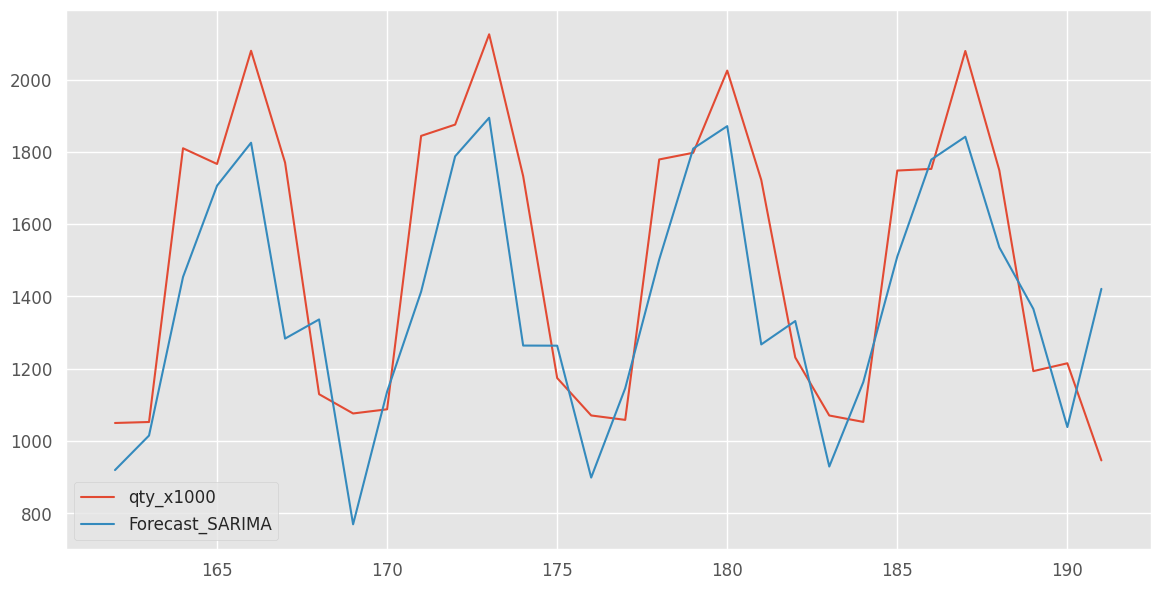

In [71]:
df_arima_valid[["qty_x1000","Forecast_SARIMA"]].plot(figsize=(14,7))

Obtenemos los siguientes resultados de RMSE de nuestro modelo de ARIMA:

In [72]:
print("RMSE of Auto SARIMA:", np.sqrt(mean_squared_error(df_arima_valid.qty_x1000, df_arima_valid.Forecast_SARIMA)))

RMSE of Auto SARIMA: 251.27014485188474


In [73]:
modelo = auto_arima(df_arima_train["qty_x1000"],start_p=1, start_q=1,
                          max_p=6,max_q=6, m=12,
                          start_P=0, seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2320.251, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2308.679, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2317.986, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=1.61 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=2193.504, Time=3.74 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=2193.449, Time=5.44 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.57 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=inf, Time=8.33 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=inf, Time=6.22 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=6.14 sec
 A

In [74]:
modelo.fit(df_arima_train.qty_x1000,exogenous=df_arima_train[exogenous_features])

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [75]:
index_future_dates=pd.date_range(start='2023-05-12',end='2023-06-02')
index_future_dates

DatetimeIndex(['2023-05-12', '2023-05-13', '2023-05-14', '2023-05-15',
               '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19',
               '2023-05-20', '2023-05-21', '2023-05-22', '2023-05-23',
               '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-27',
               '2023-05-28', '2023-05-29', '2023-05-30', '2023-05-31',
               '2023-06-01', '2023-06-02'],
              dtype='datetime64[ns]', freq='D')

In [76]:
forecast5 = modelo.predict(n_periods=len(df_arima_test2),exogenous=df_arima_test2[exogenous_features])
forecast5.index=index_future_dates
df_arima_test2["yhat_SARIMA"] = forecast5
df_arima_test2.index=df_arima_test2['FECHA']
df_arima_test2.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28,year,months,week,day,day_of_week,promo_dia,yhat_SARIMA
FECHA,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-12,2023-05-12,Internac,1,24061,1845564,243,24.061,1845.564,11.192,18.304000,18.378393,NaN,4.960711,4.829844,946.725,1526.320143,1534.450571,NaN,407.989763,392.896678,2023,5,19,12,4,1,NaN
2023-05-13,2023-05-13,Internac,1,22409,1847190,223,22.409,1847.190,24.061,18.623286,18.429286,NaN,5.286412,4.883578,1845.564,1540.222429,1535.726214,NaN,418.339103,393.880690,2023,5,19,13,5,1,NaN
2023-05-14,2023-05-14,Internac,1,25279,2102730,254,25.279,2102.730,22.409,18.871000,18.482571,NaN,5.437056,4.919733,1847.190,1553.705571,1538.610607,NaN,427.747887,395.923105,2023,5,19,14,6,1,NaN
2023-05-15,2023-05-15,Internac,1,25494,1966406,216,25.494,1966.406,25.279,19.012143,18.507893,NaN,5.611240,4.953931,2102.730,1557.107571,1539.442107,NaN,432.687405,397.123643,2023,5,20,15,0,1,NaN
2023-05-16,2023-05-16,Internac,1,14933,1232895,248,14.933,1232.895,25.494,19.570571,18.641857,NaN,6.084516,5.093408,1966.406,1588.212571,1546.447571,NaN,455.954375,403.032231,2023,5,20,16,1,0,NaN


In [77]:
forecast5

2023-05-12     919.985660
2023-05-13    1015.416306
2023-05-14    1454.090065
2023-05-15    1706.385505
2023-05-16    1825.163554
2023-05-17    1283.556322
2023-05-18    1336.464634
2023-05-19     769.974375
2023-05-20    1136.908524
2023-05-21    1413.340278
2023-05-22    1787.635141
2023-05-23    1894.200807
2023-05-24    1264.258979
2023-05-25    1263.920227
2023-05-26     899.235890
2023-05-27    1146.100022
2023-05-28    1502.180782
2023-05-29    1808.999382
2023-05-30    1871.052319
2023-05-31    1267.389388
2023-06-01    1332.051956
2023-06-02     929.698395
Freq: D, dtype: float64

<Axes: xlabel='FECHA'>

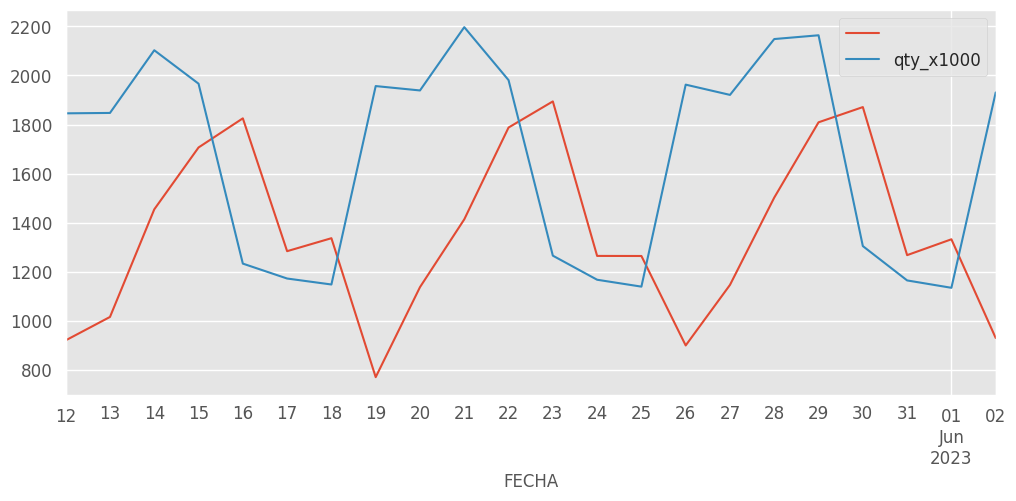

In [78]:
forecast5.plot(figsize=(12,5),legend=True)
df_arima_test2['qty_x1000'].plot(figsize=(12,5),legend=True)

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(forecast5,df_arima_test2["qty_x1000"]))
print("RMSE :",rmse)

RMSE : 646.8808356191379


In [80]:
df_arima_test2.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28,year,months,week,day,day_of_week,promo_dia,yhat_SARIMA
FECHA,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-12,2023-05-12,Internac,1,24061,1845564,243,24.061,1845.564,11.192,18.304000,18.378393,NaN,4.960711,4.829844,946.725,1526.320143,1534.450571,NaN,407.989763,392.896678,2023,5,19,12,4,1,NaN
2023-05-13,2023-05-13,Internac,1,22409,1847190,223,22.409,1847.190,24.061,18.623286,18.429286,NaN,5.286412,4.883578,1845.564,1540.222429,1535.726214,NaN,418.339103,393.880690,2023,5,19,13,5,1,NaN
2023-05-14,2023-05-14,Internac,1,25279,2102730,254,25.279,2102.730,22.409,18.871000,18.482571,NaN,5.437056,4.919733,1847.190,1553.705571,1538.610607,NaN,427.747887,395.923105,2023,5,19,14,6,1,NaN
2023-05-15,2023-05-15,Internac,1,25494,1966406,216,25.494,1966.406,25.279,19.012143,18.507893,NaN,5.611240,4.953931,2102.730,1557.107571,1539.442107,NaN,432.687405,397.123643,2023,5,20,15,0,1,NaN
2023-05-16,2023-05-16,Internac,1,14933,1232895,248,14.933,1232.895,25.494,19.570571,18.641857,NaN,6.084516,5.093408,1966.406,1588.212571,1546.447571,NaN,455.954375,403.032231,2023,5,20,16,1,0,NaN


Ahora agregamos un nuevo feature de si es día promocional a las variables exógenas y ver si observamos un cambio en la predicción:

In [85]:
exogenous_features = ["traff_x1000_mean_lag1","traff_x1000_mean_lag7","traff_x1000_mean_lag28",
                      "traff_x1000_std_lag1","traff_x1000_std_lag7","traff_x1000_std_lag28",
                      "qty_x1000_mean_lag1","qty_x1000_mean_lag7", "qty_x1000_mean_lag28",
                      "qty_x1000_std_lag1", "qty_x1000_std_lag7", "qty_x1000_std_lag28",
                      "months", "week", "day", "day_of_week","promo_dia"]

Creamos y ejecutamos un nuevo modelo, donde incluimos ahora el nuevo feature que decidimos agregar que contiene si es un día promocional:

In [83]:
another_model2 = auto_arima(df_arima_train["qty_x1000"],start_p=1, start_q=1,
                          max_p=6,max_q=6, m=12,
                          start_P=0, seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2320.251, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2308.679, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2317.986, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=2193.504, Time=5.40 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=2193.449, Time=3.84 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.70 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.46 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=inf, Time=8.25 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=inf, Time=6.03 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=6.51 sec
 A

Obtenemos la siguiente predicción:

In [86]:
another_model2.fit(df_arima_train.qty_x1000,exogenous=df_arima_train[exogenous_features])

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [87]:
forecast3 = another_model.predict(n_periods=len(df_arima_valid),exogenous=df_arima_valid[exogenous_features])
df_arima_valid["Forecast_SARIMA"] = forecast3

Obtenemos el siguiente modelo, que podemos observar en el siguiente gráfico:

<Axes: >

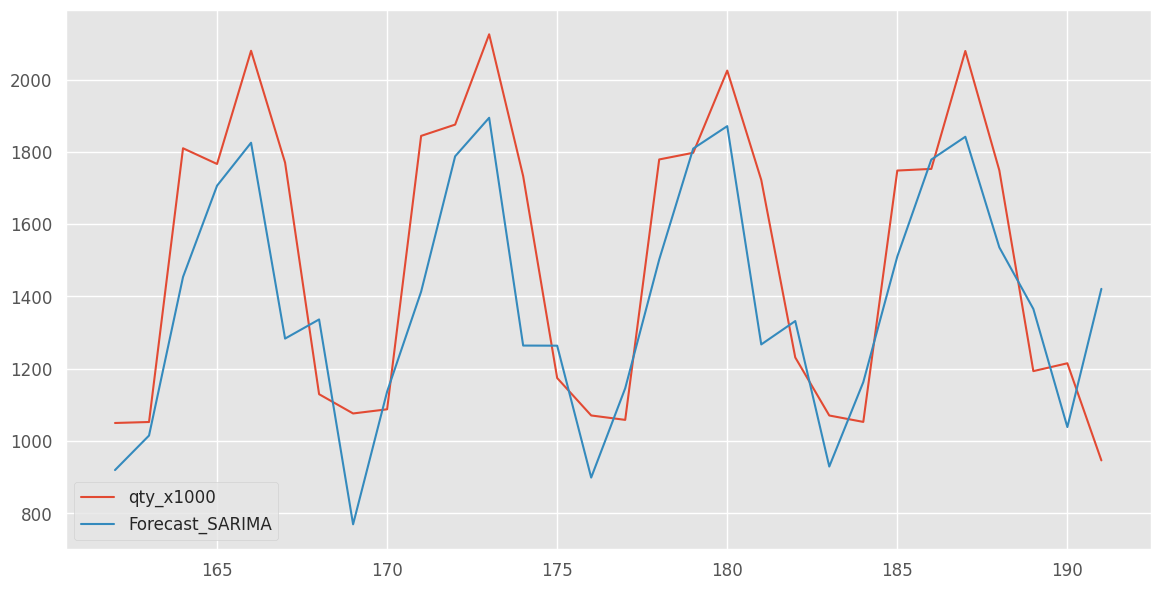

In [88]:
df_arima_valid[["qty_x1000","Forecast_SARIMA"]].plot(figsize=(14,7))

In [89]:
print("RMSE of Auto SARIMA:", np.sqrt(mean_squared_error(df_arima_valid.qty_x1000, df_arima_valid.Forecast_SARIMA)))

RMSE of Auto SARIMA: 251.27014485188474


**Conclusión: Sin embargo no observamos que mejore la predicción agregando el feature de si es día promocional.** 

#**Ahora utilizaremos un modelo de Serie de Tiempo usando Prophet:**

Procedemos a declarar nuestro dataset a utilizarse en Prophet:

In [91]:
df_arima2 = df_arima.iloc[:len(df_arima)-22]

df_prophet=df_arima2

**Procedemos a crear el nuevo feature que es indispensable para usarse en la libreria de Prophet 'ds' (de la variable fecha):**

In [92]:
df_prophet['ds']= df_prophet['year'].apply('{:0>2d}'.format) +'-' + df_prophet['months'].apply('{:0>2d}'.format)+'-'+df_prophet['day'].apply('{:0>2d}'.format) # To create a format mm-dd
df_prophet

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28,year,months,week,day,day_of_week,promo_dia,ds
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,44,1,1,0,2022-11-01
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.997,13.997000,13.997000,NaN,NaN,NaN,1157.375,1157.375000,1157.375000,NaN,NaN,NaN,2022,11,44,2,2,0,2022-11-02
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,12.754,13.375500,13.375500,NaN,0.878934,0.878934,1062.818,1110.096500,1110.096500,NaN,66.861896,66.861896,2022,11,44,3,3,0,2022-11-03
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,12.441,13.064000,13.064000,NaN,0.823018,0.823018,1040.217,1086.803333,1086.803333,NaN,62.152807,62.152807,2022,11,44,4,4,1,2022-11-04
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,23.045,15.559250,15.559250,NaN,5.035540,5.035540,1800.050,1265.115000,1265.115000,NaN,360.215930,360.215930,2022,11,44,5,5,1,2022-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-05-07,Internac,1,24291,2078916,175,24.291,2078.916,20.675,18.046143,18.282500,NaN,4.816265,4.830689,1752.808,1514.777571,1526.227036,NaN,388.303992,390.817966,2023,5,18,7,6,1,2023-05-07
188,2023-05-08,Internac,1,21585,1748671,180,21.585,1748.671,24.291,18.127286,18.310071,NaN,4.931259,4.863774,2078.916,1522.528000,1529.671214,NaN,400.526419,395.385958,2023,5,19,8,0,1,2023-05-08
189,2023-05-09,Internac,1,14133,1193611,184,14.133,1193.611,21.585,18.216286,18.322464,NaN,4.996143,4.871946,1748.671,1526.294143,1530.318214,NaN,402.835325,395.741517,2023,5,19,9,1,0,2023-05-09
190,2023-05-10,Internac,1,14426,1215262,209,14.426,1215.262,14.133,18.199143,18.349393,NaN,5.012188,4.845622,1193.611,1520.895571,1532.346143,NaN,407.670187,393.791129,2023,5,19,10,2,0,2023-05-10


Definimos las variables de 'y' y 'ds', que son las variables básicas a utilizarse en el algoritmo de predicción. Donde y es la varible objetivo y ds es la variable predictora:

In [93]:
pred = df_prophet[['qty_x1000','ds']]
pred.columns = ['y','ds']

In [94]:
pred.head()

,y,ds
0,1157.375,2022-11-01
1,1062.818,2022-11-02
2,1040.217,2022-11-03
3,1800.050,2022-11-04
4,1830.014,2022-11-05


Separamos nuestros datos de entrenamiento y de validación para Prophet:

In [95]:
train_data_pr=pred.iloc[:len(pred)-30]
val_data_pr=pred.iloc[len(pred)-30:]
train_data=pred.iloc[:len(pred)-30]
val_data=pred.iloc[len(pred)-30:]

In [96]:
train_data_pr

,y,ds
0,1157.375,2022-11-01
1,1062.818,2022-11-02
2,1040.217,2022-11-03
3,1800.050,2022-11-04
4,1830.014,2022-11-05
...,...,...
157,1799.133,2023-04-07
158,1760.949,2023-04-08
159,1982.479,2023-04-09
160,1730.555,2023-04-10


Modelo sin utilizar el hyperparámetro de holidays:

In [97]:
m = Prophet(interval_width=0.95, seasonality_mode='additive', weekly_seasonality=True)
model = m.fit(train_data_pr)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeme4st_1/nlxo4nr_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeme4st_1/stpynpct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98341', 'data', 'file=/tmp/tmpeme4st_1/nlxo4nr_.json', 'init=/tmp/tmpeme4st_1/stpynpct.json', 'output', 'file=/tmp/tmpeme4st_1/prophet_modeliwcx6x6i/prophet_model-20230605001652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Obtenemos el modelo de predicción usando Prophet:

In [98]:
future = m.make_future_dataframe(periods=30, freq='D',include_history=True)
prophet_pred = m.predict(future)
prophet_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1486.387786,894.987561,1347.629268,1486.387786,1486.387786,-367.431526,-367.431526,-367.431526,-367.431526,-367.431526,-367.431526,0.0,0.0,0.0,1118.956260
1,2022-11-02,1485.793199,820.224772,1302.060958,1485.793199,1485.793199,-421.036131,-421.036131,-421.036131,-421.036131,-421.036131,-421.036131,0.0,0.0,0.0,1064.757068
2,2022-11-03,1485.198613,811.158787,1284.266786,1485.198613,1485.198613,-431.391195,-431.391195,-431.391195,-431.391195,-431.391195,-431.391195,0.0,0.0,0.0,1053.807418
3,2022-11-04,1484.604027,1569.169011,2042.320268,1484.604027,1484.604027,318.911539,318.911539,318.911539,318.911539,318.911539,318.911539,0.0,0.0,0.0,1803.515566
4,2022-11-05,1484.009440,1555.555441,2025.758146,1484.009440,1484.009440,312.883653,312.883653,312.883653,312.883653,312.883653,312.883653,0.0,0.0,0.0,1796.893093


Observamos los últimos valores de predicción (yhat) obtenidos:

In [99]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
187,2023-05-07,1536.612964,1679.929538,2156.801263,1532.473385,1541.503867,388.954436,388.954436,388.954436,388.954436,388.954436,388.954436,0.0,0.0,0.0,1925.567400
188,2023-05-08,1537.359726,1492.062820,1971.439267,1532.994092,1542.477243,199.109223,199.109223,199.109223,199.109223,199.109223,199.109223,0.0,0.0,0.0,1736.468949
189,2023-05-09,1538.106488,904.393917,1409.883460,1533.498196,1543.463543,-367.431526,-367.431526,-367.431526,-367.431526,-367.431526,-367.431526,0.0,0.0,0.0,1170.674963
190,2023-05-10,1538.853251,870.316513,1351.239054,1534.014969,1544.427615,-421.036131,-421.036131,-421.036131,-421.036131,-421.036131,-421.036131,0.0,0.0,0.0,1117.817119
191,2023-05-11,1539.600013,855.898002,1336.005865,1534.476069,1545.531566,-431.391195,-431.391195,-431.391195,-431.391195,-431.391195,-431.391195,0.0,0.0,0.0,1108.208818


In [100]:
prophet_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          192 non-null    datetime64[ns]
 1   trend                       192 non-null    float64       
 2   yhat_lower                  192 non-null    float64       
 3   yhat_upper                  192 non-null    float64       
 4   trend_lower                 192 non-null    float64       
 5   trend_upper                 192 non-null    float64       
 6   additive_terms              192 non-null    float64       
 7   additive_terms_lower        192 non-null    float64       
 8   additive_terms_upper        192 non-null    float64       
 9   weekly                      192 non-null    float64       
 10  weekly_lower                192 non-null    float64       
 11  weekly_upper                192 non-null    float64       

Procedemos a filtrar los campos de fecha y el valor de predicción (yhat):

In [101]:
prophet_pred[['ds', 'yhat', 'yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-11-01,1118.956260,894.987561,1347.629268
1,2022-11-02,1064.757068,820.224772,1302.060958
2,2022-11-03,1053.807418,811.158787,1284.266786
3,2022-11-04,1803.515566,1569.169011,2042.320268
4,2022-11-05,1796.893093,1555.555441,2025.758146
...,...,...,...,...
187,2023-05-07,1925.567400,1679.929538,2156.801263
188,2023-05-08,1736.468949,1492.062820,1971.439267
189,2023-05-09,1170.674963,904.393917,1409.883460
190,2023-05-10,1117.817119,870.316513,1351.239054


Procedemos a observar los últimos 30 días de predicción:

In [102]:
prophet_pred= pd.DataFrame({"Date" : prophet_pred[-30:]['ds'], "Pred": prophet_pred[-30:]["yhat"],"Pred_inf": prophet_pred[-30:]["yhat_lower"],"Pred_sup": prophet_pred[-30:]["yhat_upper"]})

In [103]:
prophet_pred.head()

,Date,Pred,Pred_inf,Pred_sup
162,2023-04-12,1096.907772,835.646692,1333.872785
163,2023-04-13,1087.299471,860.101141,1320.993774
164,2023-04-14,1838.348967,1603.046649,2057.731129
165,2023-04-15,1833.067844,1578.382210,2084.783537
166,2023-04-16,1909.885389,1668.570719,2157.305929


In [104]:
prophet_pred=prophet_pred.set_index("Date")

In [105]:
prophet_pred.index.freq="D"

In [106]:
prophet_pred

,Pred,Pred_inf,Pred_sup
Date,,,
2023-04-12,1096.907772,835.646692,1333.872785
2023-04-13,1087.299471,860.101141,1320.993774
2023-04-14,1838.348967,1603.046649,2057.731129
2023-04-15,1833.067844,1578.382210,2084.783537
2023-04-16,1909.885389,1668.570719,2157.305929
2023-04-17,1720.786938,1491.531406,1975.183981
2023-04-18,1154.992952,917.746804,1405.626560
2023-04-19,1102.135109,847.375562,1367.975195
2023-04-20,1092.526808,848.758013,1355.802854


Procedemos agregar una columna al dataframe original con los valores predecidos (yhat):

In [107]:
val_data_pr["Prophet_Predictions"] = prophet_pred['Pred'].values
val_data_pr["lower"] = prophet_pred['Pred_inf'].values
val_data_pr["upper"] = prophet_pred['Pred_sup'].values
val_data_pr.head()

,y,ds,Prophet_Predictions,lower,upper
162,1050.175,2023-04-12,1096.907772,835.646692,1333.872785
163,1052.888,2023-04-13,1087.299471,860.101141,1320.993774
164,1809.846,2023-04-14,1838.348967,1603.046649,2057.731129
165,1766.427,2023-04-15,1833.067844,1578.382210,2084.783537
166,2079.448,2023-04-16,1909.885389,1668.570719,2157.305929


In [108]:
val_data_pr.tail()

,y,ds,Prophet_Predictions,lower,upper
187,2078.916,2023-05-07,1925.567400,1679.929538,2156.801263
188,1748.671,2023-05-08,1736.468949,1492.062820,1971.439267
189,1193.611,2023-05-09,1170.674963,904.393917,1409.883460
190,1215.262,2023-05-10,1117.817119,870.316513,1351.239054
191,946.725,2023-05-11,1108.208818,855.898002,1336.005865


In [109]:
val_data_pr['FECHA'] = val_data_pr.ds
val_data_pr.head()

,y,ds,Prophet_Predictions,lower,upper,FECHA
162,1050.175,2023-04-12,1096.907772,835.646692,1333.872785,2023-04-12
163,1052.888,2023-04-13,1087.299471,860.101141,1320.993774,2023-04-13
164,1809.846,2023-04-14,1838.348967,1603.046649,2057.731129,2023-04-14
165,1766.427,2023-04-15,1833.067844,1578.382210,2084.783537,2023-04-15
166,2079.448,2023-04-16,1909.885389,1668.570719,2157.305929,2023-04-16


Podemos observar la predicción del modelo con Prophet, sin agregar la variable de día de promoción:

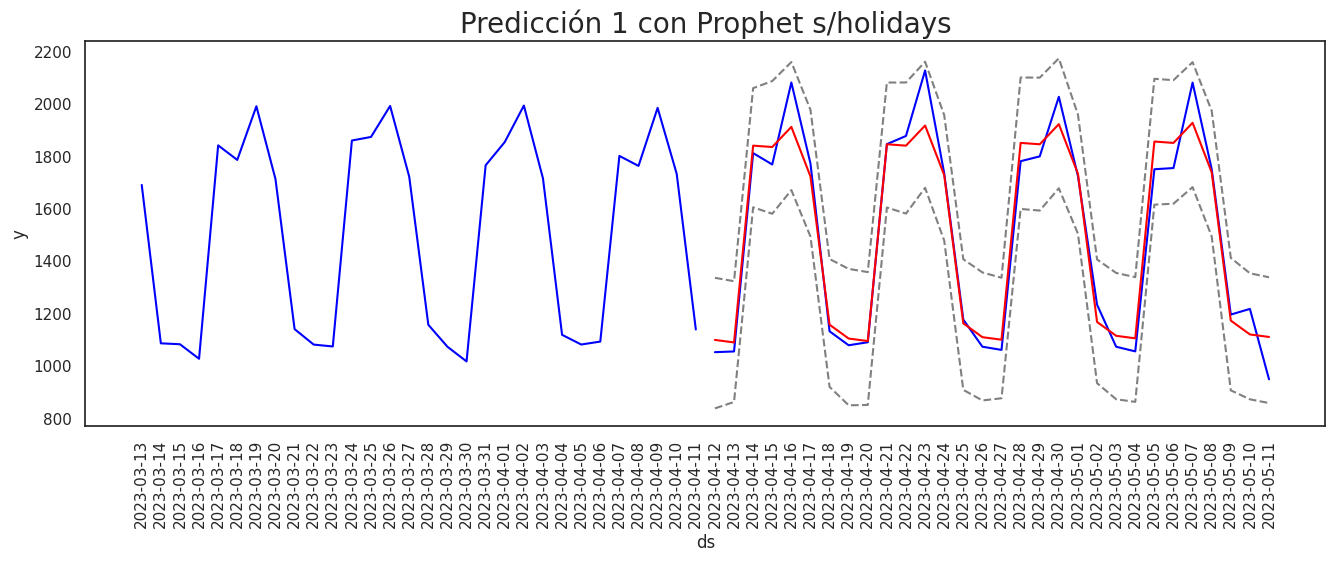

In [110]:
sns.set(style='white')
plt.figure(figsize=(16,5))
ax=sns.lineplot(x=train_data_pr['ds'].iloc[len(train_data_pr)-30:],y=train_data_pr["y"].iloc[len(train_data_pr)-30:],color='blue')
ax=sns.lineplot(x=val_data_pr['FECHA'],y=val_data_pr["y"],color='blue')
ax=sns.lineplot(x=val_data_pr['FECHA'],y=val_data_pr["Prophet_Predictions"],color='red');
ax=sns.lineplot(x=val_data_pr['FECHA'],y=val_data_pr["lower"],color='gray',linestyle='dashed');
ax=sns.lineplot(x=val_data_pr['FECHA'],y=val_data_pr["upper"],color='gray',linestyle='dashed');
#plt.grid(linestyle='-',linewidth=0.3)
ax.tick_params(axis='x', rotation=90)
plt.title("Predicción 1 con Prophet s/holidays", fontsize=20);
plt.show()


In [111]:
df_actual=val_data_pr["y"]

Obtenemos el siguiente resultado de RMSE para el modelo de predicción realizado (Prophet):

In [112]:
se = np.square(val_data_pr.loc[:, 'Prophet_Predictions'] - df_actual)
mse = np.mean(se)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

RMSE : 80.90343400069392


# **Prueba #2 con Prophet. Agregaremos al modelo el parámetro Holidays, alimentado por la lista que generamos, que incluye los días de Navidad y Año Nuevo:**

In [113]:
df_prophet['ds']= df_prophet['year'].apply('{:0>2d}'.format) +'-' + df_prophet['months'].apply('{:0>2d}'.format)+'-'+df_prophet['day'].apply('{:0>2d}'.format) # To create a format mm-dd
df_prophet

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28,year,months,week,day,day_of_week,promo_dia,ds
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,44,1,1,0,2022-11-01
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.997,13.997000,13.997000,NaN,NaN,NaN,1157.375,1157.375000,1157.375000,NaN,NaN,NaN,2022,11,44,2,2,0,2022-11-02
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,12.754,13.375500,13.375500,NaN,0.878934,0.878934,1062.818,1110.096500,1110.096500,NaN,66.861896,66.861896,2022,11,44,3,3,0,2022-11-03
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,12.441,13.064000,13.064000,NaN,0.823018,0.823018,1040.217,1086.803333,1086.803333,NaN,62.152807,62.152807,2022,11,44,4,4,1,2022-11-04
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,23.045,15.559250,15.559250,NaN,5.035540,5.035540,1800.050,1265.115000,1265.115000,NaN,360.215930,360.215930,2022,11,44,5,5,1,2022-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-05-07,Internac,1,24291,2078916,175,24.291,2078.916,20.675,18.046143,18.282500,NaN,4.816265,4.830689,1752.808,1514.777571,1526.227036,NaN,388.303992,390.817966,2023,5,18,7,6,1,2023-05-07
188,2023-05-08,Internac,1,21585,1748671,180,21.585,1748.671,24.291,18.127286,18.310071,NaN,4.931259,4.863774,2078.916,1522.528000,1529.671214,NaN,400.526419,395.385958,2023,5,19,8,0,1,2023-05-08
189,2023-05-09,Internac,1,14133,1193611,184,14.133,1193.611,21.585,18.216286,18.322464,NaN,4.996143,4.871946,1748.671,1526.294143,1530.318214,NaN,402.835325,395.741517,2023,5,19,9,1,0,2023-05-09
190,2023-05-10,Internac,1,14426,1215262,209,14.426,1215.262,14.133,18.199143,18.349393,NaN,5.012188,4.845622,1193.611,1520.895571,1532.346143,NaN,407.670187,393.791129,2023,5,19,10,2,0,2023-05-10


In [114]:
pred = df_prophet[['qty_x1000','ds']]
pred.columns = ['y','ds']

In [115]:
n = Prophet(holidays=holidays, interval_width=0.95, seasonality_mode='additive', weekly_seasonality=True)
model = n.fit(train_data_pr)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeme4st_1/umvt__7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeme4st_1/le9tmquo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83122', 'data', 'file=/tmp/tmpeme4st_1/umvt__7l.json', 'init=/tmp/tmpeme4st_1/le9tmquo.json', 'output', 'file=/tmp/tmpeme4st_1/prophet_modelhd1u78h9/prophet_model-20230605001653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Obtenemos el modelo de predicción usando Prophet:

In [116]:
future2 = n.make_future_dataframe(periods=30, freq='D',include_history=True)
prophet_pred2 = n.predict(future2)
prophet_pred2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Año Nuevo,Año Nuevo_lower,Año Nuevo_upper,Dia Cariño,Dia Cariño_lower,Dia Cariño_upper,Dia Madre,Dia Madre_lower,Dia Madre_upper,Navidad,Navidad_lower,Navidad_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1521.393328,1031.872776,1274.537036,1521.393328,1521.393328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-372.799994,-372.799994,-372.799994,0.0,0.0,0.0,-372.799994,-372.799994,-372.799994,0.0,0.0,0.0,1148.593334
1,2022-11-02,1519.544800,979.251035,1218.572926,1519.544800,1519.544800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-426.825872,-426.825872,-426.825872,0.0,0.0,0.0,-426.825872,-426.825872,-426.825872,0.0,0.0,0.0,1092.718928
2,2022-11-03,1517.696272,958.076526,1202.525463,1517.696272,1517.696272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-436.978808,-436.978808,-436.978808,0.0,0.0,0.0,-436.978808,-436.978808,-436.978808,0.0,0.0,0.0,1080.717463
3,2022-11-04,1515.847744,1714.010203,1945.924653,1515.847744,1515.847744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,313.611683,313.611683,313.611683,0.0,0.0,0.0,313.611683,313.611683,313.611683,0.0,0.0,0.0,1829.459427
4,2022-11-05,1513.999216,1665.512045,1901.954668,1513.999216,1513.999216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266.867535,266.867535,266.867535,0.0,0.0,0.0,266.867535,266.867535,266.867535,0.0,0.0,0.0,1780.866751


In [117]:
prophet_pred2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Año Nuevo,Año Nuevo_lower,Año Nuevo_upper,Dia Cariño,Dia Cariño_lower,Dia Cariño_upper,Dia Madre,Dia Madre_lower,Dia Madre_upper,Navidad,Navidad_lower,Navidad_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
187,2023-05-07,1536.966717,1866.138330,2120.448316,1527.513210,1545.447443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,460.217613,460.217613,460.217613,0.0,0.0,0.0,460.217613,460.217613,460.217613,0.0,0.0,0.0,1997.184330
188,2023-05-08,1537.648432,1608.144028,1852.476490,1527.601733,1546.654002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.907843,195.907843,195.907843,0.0,0.0,0.0,195.907843,195.907843,195.907843,0.0,0.0,0.0,1733.556275
189,2023-05-09,1538.330147,1047.847151,1289.812800,1527.902375,1547.986103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-372.799994,-372.799994,-372.799994,0.0,0.0,0.0,-372.799994,-372.799994,-372.799994,0.0,0.0,0.0,1165.530153
190,2023-05-10,1539.011862,992.329039,1230.211081,1527.972794,1549.476743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-426.825872,-426.825872,-426.825872,0.0,0.0,0.0,-426.825872,-426.825872,-426.825872,0.0,0.0,0.0,1112.185991
191,2023-05-11,1539.693577,981.641094,1215.697206,1528.140614,1550.450953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-436.978808,-436.978808,-436.978808,0.0,0.0,0.0,-436.978808,-436.978808,-436.978808,0.0,0.0,0.0,1102.714769


Procedemos a filtrar los campos de fecha y el valor de predicción (yhat):

In [118]:
prophet_pred2[['ds', 'yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-11-01,1148.593334,1031.872776,1274.537036
1,2022-11-02,1092.718928,979.251035,1218.572926
2,2022-11-03,1080.717463,958.076526,1202.525463
3,2022-11-04,1829.459427,1714.010203,1945.924653
4,2022-11-05,1780.866751,1665.512045,1901.954668
...,...,...,...,...
187,2023-05-07,1997.184330,1866.138330,2120.448316
188,2023-05-08,1733.556275,1608.144028,1852.476490
189,2023-05-09,1165.530153,1047.847151,1289.812800
190,2023-05-10,1112.185991,992.329039,1230.211081


Procedemos a observar los últimos 30 días de predicción:

In [119]:
prophet_pred2= pd.DataFrame({"Date" : prophet_pred2[-30:]['ds'], "Pred": prophet_pred2[-30:]["yhat"],"Pred_inf": prophet_pred2[-30:]["yhat_lower"],"Pred_sup": prophet_pred2[-30:]["yhat_upper"]})

In [120]:
prophet_pred2

,Date,Pred,Pred_inf,Pred_sup
162,2023-04-12,1093.097972,976.127405,1207.749956
163,2023-04-13,1083.626750,959.377469,1202.497309
164,2023-04-14,1834.898957,1712.804372,1945.971408
165,2023-04-15,1788.836524,1673.935110,1913.703116
166,2023-04-16,1982.868316,1867.308419,2105.964016
167,2023-04-17,1719.240261,1599.969136,1842.063996
168,2023-04-18,1151.214140,1027.341314,1281.009136
169,2023-04-19,1097.869977,980.170093,1208.968796
170,2023-04-20,1088.398755,974.025568,1204.000095
171,2023-04-21,1839.670962,1726.133385,1961.419175


In [121]:
prophet_pred2=prophet_pred2.set_index("Date")

In [122]:
prophet_pred2.index.freq="D"

In [123]:
prophet_pred2

,Pred,Pred_inf,Pred_sup
Date,,,
2023-04-12,1093.097972,976.127405,1207.749956
2023-04-13,1083.626750,959.377469,1202.497309
2023-04-14,1834.898957,1712.804372,1945.971408
2023-04-15,1788.836524,1673.935110,1913.703116
2023-04-16,1982.868316,1867.308419,2105.964016
2023-04-17,1719.240261,1599.969136,1842.063996
2023-04-18,1151.214140,1027.341314,1281.009136
2023-04-19,1097.869977,980.170093,1208.968796
2023-04-20,1088.398755,974.025568,1204.000095


In [124]:
val_data_pr=pred.iloc[len(pred)-30:]
val_data_pr.tail()

,y,ds
187,2078.916,2023-05-07
188,1748.671,2023-05-08
189,1193.611,2023-05-09
190,1215.262,2023-05-10
191,946.725,2023-05-11


In [125]:
val_data_pr["Prophet_Predictions"] = prophet_pred2['Pred'].values
val_data_pr["lower"] = prophet_pred2['Pred_inf'].values
val_data_pr["upper"] = prophet_pred2['Pred_sup'].values
val_data_pr.head()

,y,ds,Prophet_Predictions,lower,upper
162,1050.175,2023-04-12,1093.097972,976.127405,1207.749956
163,1052.888,2023-04-13,1083.626750,959.377469,1202.497309
164,1809.846,2023-04-14,1834.898957,1712.804372,1945.971408
165,1766.427,2023-04-15,1788.836524,1673.935110,1913.703116
166,2079.448,2023-04-16,1982.868316,1867.308419,2105.964016


In [126]:
val_data_pr['FECHA']=val_data_pr['ds']
val_data_pr.tail()

,y,ds,Prophet_Predictions,lower,upper,FECHA
187,2078.916,2023-05-07,1997.184330,1866.138330,2120.448316,2023-05-07
188,1748.671,2023-05-08,1733.556275,1608.144028,1852.476490,2023-05-08
189,1193.611,2023-05-09,1165.530153,1047.847151,1289.812800,2023-05-09
190,1215.262,2023-05-10,1112.185991,992.329039,1230.211081,2023-05-10
191,946.725,2023-05-11,1102.714769,981.641094,1215.697206,2023-05-11


Podemos observar la predicción del modelo con Prophet, sin agregar la variable de día de promoción:

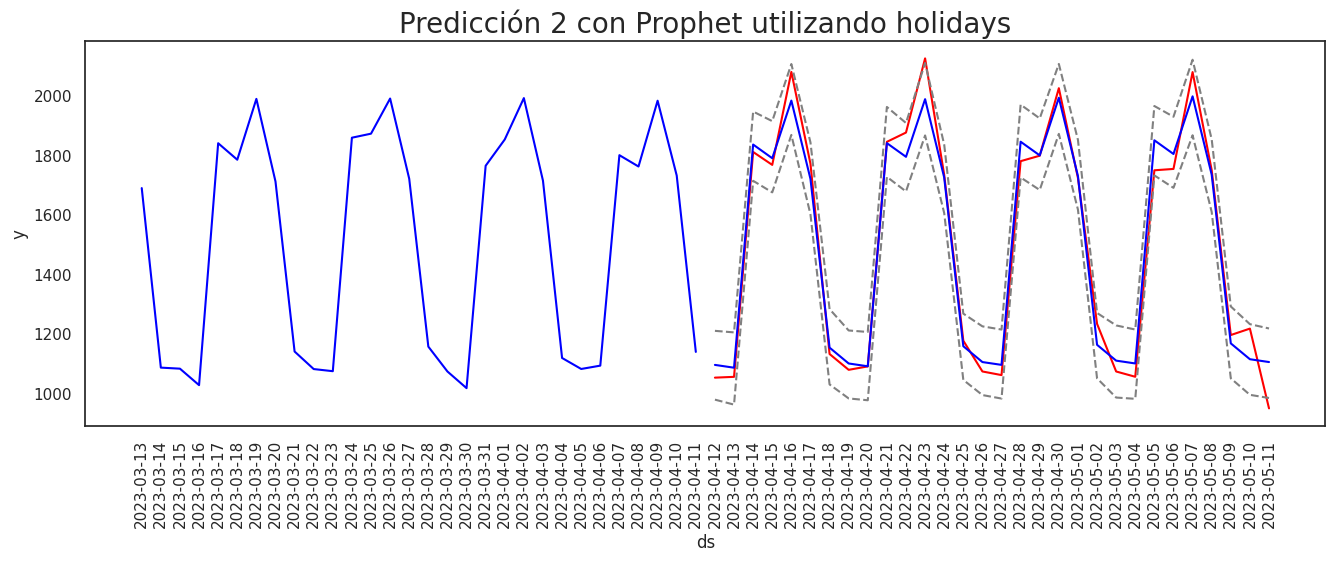

In [127]:
sns.set(style='white')
#sns.color_palette('husl',5)
plt.figure(figsize=(16,5))
ax=sns.lineplot(x=train_data_pr['ds'].iloc[len(train_data_pr)-30:],y=train_data_pr["y"].iloc[len(train_data_pr)-30:],color='blue')
ax=sns.lineplot(x=val_data_pr['FECHA'],y=val_data_pr["y"],color='red')
ax=sns.lineplot(x=val_data_pr['FECHA'],y=val_data_pr["Prophet_Predictions"],color='blue');
ax=sns.lineplot(x=val_data_pr['FECHA'],y=val_data_pr["lower"],color='gray',linestyle='dashed');
ax=sns.lineplot(x=val_data_pr['FECHA'],y=val_data_pr["upper"],color='gray',linestyle='dashed');
#plt.grid(linestyle='-',linewidth=0.3)
ax.tick_params(axis='x', rotation=90)
plt.title("Predicción 2 con Prophet utilizando holidays", fontsize=20);
ax.tick_params(axis='x', rotation=90)
plt.show()

In [128]:
df_actual=val_data_pr["y"]

Obtenemos el siguiente resultado de RMSE para el modelo de predicción realizado (Prophet):

In [129]:
se = np.square(val_data_pr.loc[:, 'Prophet_Predictions'] - df_actual)
mse = np.mean(se)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

RMSE : 61.64998898622464


#**Podemos concluir que el RMSE mejoró significativamente al agregar los días de asueto usando el modelo de predicción Prophet.**

# **Prueba con data apartada.** 

In [130]:
df_prophet = df_arima

In [131]:
df_prophet['ds']= df_prophet['year'].apply('{:0>2d}'.format) +'-' + df_prophet['months'].apply('{:0>2d}'.format)+'-'+df_prophet['day'].apply('{:0>2d}'.format) # To create a format mm-dd
df_prophet

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag1,traff_x1000_mean_lag7,traff_x1000_mean_lag28,traff_x1000_std_lag1,traff_x1000_std_lag7,traff_x1000_std_lag28,qty_x1000_mean_lag1,qty_x1000_mean_lag7,qty_x1000_mean_lag28,qty_x1000_std_lag1,qty_x1000_std_lag7,qty_x1000_std_lag28,year,months,week,day,day_of_week,promo_dia,ds
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,44,1,1,0,2022-11-01
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.997,13.997000,13.997000,NaN,NaN,NaN,1157.375,1157.375000,1157.375000,NaN,NaN,NaN,2022,11,44,2,2,0,2022-11-02
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,12.754,13.375500,13.375500,NaN,0.878934,0.878934,1062.818,1110.096500,1110.096500,NaN,66.861896,66.861896,2022,11,44,3,3,0,2022-11-03
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,12.441,13.064000,13.064000,NaN,0.823018,0.823018,1040.217,1086.803333,1086.803333,NaN,62.152807,62.152807,2022,11,44,4,4,1,2022-11-04
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,23.045,15.559250,15.559250,NaN,5.035540,5.035540,1800.050,1265.115000,1265.115000,NaN,360.215930,360.215930,2022,11,44,5,5,1,2022-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2023-05-29,Internac,1,27822,2163788,214,27.822,2163.788,25.665,20.433714,19.517464,NaN,5.738175,5.319288,2148.438,1654.867714,1598.325179,NaN,441.794649,412.216882,2023,5,22,29,0,1,2023-05-29
210,2023-05-30,Internac,1,15773,1304342,231,15.773,1304.342,27.822,20.755286,19.762464,NaN,6.124148,5.541621,2163.788,1680.988429,1614.092321,NaN,468.862772,425.368252,2023,5,22,30,1,0,2023-05-30
211,2023-05-31,Internac,1,14054,1164325,229,14.054,1164.325,15.773,20.815571,19.816750,NaN,6.063862,5.492882,1304.342,1686.569000,1616.697357,NaN,463.289536,423.155372,2023,5,22,31,2,0,2023-05-31
212,2023-06-01,Internac,1,13565,1134246,220,13.565,1134.246,14.054,20.805571,19.868643,NaN,6.076780,5.428676,1164.325,1686.170714,1620.034893,NaN,463.811441,419.039394,2023,6,22,1,3,0,2023-06-01


In [132]:
m = Prophet(holidays=holidays,interval_width=0.95, seasonality_mode='additive', weekly_seasonality=True)
model = m.fit(train_data_pr)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeme4st_1/z9uk2yes.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeme4st_1/xh_wgxk6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14724', 'data', 'file=/tmp/tmpeme4st_1/z9uk2yes.json', 'init=/tmp/tmpeme4st_1/xh_wgxk6.json', 'output', 'file=/tmp/tmpeme4st_1/prophet_modelwzbr575m/prophet_model-20230605001655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [133]:
future3 = m.make_future_dataframe(periods=52, freq='D',include_history=True)
prophet_pred3 = m.predict(future3)
prophet_pred3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Año Nuevo,Año Nuevo_lower,Año Nuevo_upper,Dia Cariño,Dia Cariño_lower,Dia Cariño_upper,Dia Madre,Dia Madre_lower,Dia Madre_upper,Navidad,Navidad_lower,Navidad_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1521.393328,1025.335798,1264.267001,1521.393328,1521.393328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-372.799994,-372.799994,-372.799994,0.0,0.0,0.0,-372.799994,-372.799994,-372.799994,0.0,0.0,0.0,1148.593334
1,2022-11-02,1519.544800,966.866420,1214.318002,1519.544800,1519.544800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-426.825872,-426.825872,-426.825872,0.0,0.0,0.0,-426.825872,-426.825872,-426.825872,0.0,0.0,0.0,1092.718928
2,2022-11-03,1517.696272,953.286488,1203.474098,1517.696272,1517.696272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-436.978808,-436.978808,-436.978808,0.0,0.0,0.0,-436.978808,-436.978808,-436.978808,0.0,0.0,0.0,1080.717463
3,2022-11-04,1515.847744,1709.409986,1946.049013,1515.847744,1515.847744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,313.611683,313.611683,313.611683,0.0,0.0,0.0,313.611683,313.611683,313.611683,0.0,0.0,0.0,1829.459427
4,2022-11-05,1513.999216,1650.381123,1904.192354,1513.999216,1513.999216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266.867535,266.867535,266.867535,0.0,0.0,0.0,266.867535,266.867535,266.867535,0.0,0.0,0.0,1780.866751


In [134]:
prophet_pred3.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Año Nuevo,Año Nuevo_lower,Año Nuevo_upper,Dia Cariño,Dia Cariño_lower,Dia Cariño_upper,Dia Madre,Dia Madre_lower,Dia Madre_upper,Navidad,Navidad_lower,Navidad_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
209,2023-05-29,1551.964446,1635.857723,1869.531104,1530.257847,1573.696379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.907843,195.907843,195.907843,0.0,0.0,0.0,195.907843,195.907843,195.907843,0.0,0.0,0.0,1747.872289
210,2023-05-30,1552.646161,1057.287801,1304.448816,1529.973490,1575.188887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-372.799994,-372.799994,-372.799994,0.0,0.0,0.0,-372.799994,-372.799994,-372.799994,0.0,0.0,0.0,1179.846167
211,2023-05-31,1553.327876,1003.882215,1246.667162,1529.414412,1576.490657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-426.825872,-426.825872,-426.825872,0.0,0.0,0.0,-426.825872,-426.825872,-426.825872,0.0,0.0,0.0,1126.502004
212,2023-06-01,1554.009591,989.035008,1243.832785,1529.756731,1577.727306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-436.978808,-436.978808,-436.978808,0.0,0.0,0.0,-436.978808,-436.978808,-436.978808,0.0,0.0,0.0,1117.030782
213,2023-06-02,1554.691306,1757.039811,1992.277357,1530.473782,1579.289595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,313.611683,313.611683,313.611683,0.0,0.0,0.0,313.611683,313.611683,313.611683,0.0,0.0,0.0,1868.302989


In [135]:
prophet_pred3[['ds', 'yhat', 'yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-11-01,1148.593334,1025.335798,1264.267001
1,2022-11-02,1092.718928,966.866420,1214.318002
2,2022-11-03,1080.717463,953.286488,1203.474098
3,2022-11-04,1829.459427,1709.409986,1946.049013
4,2022-11-05,1780.866751,1650.381123,1904.192354
...,...,...,...,...
209,2023-05-29,1747.872289,1635.857723,1869.531104
210,2023-05-30,1179.846167,1057.287801,1304.448816
211,2023-05-31,1126.502004,1003.882215,1246.667162
212,2023-06-01,1117.030782,989.035008,1243.832785


In [136]:
prophet_pred3= pd.DataFrame({"Date" : prophet_pred3[-22:]['ds'], "Pred": prophet_pred3[-22:]["yhat"],"Pred_inf": prophet_pred3[-22:]["yhat_lower"],"Pred_sup": prophet_pred3[-22:]["yhat_upper"]})

In [137]:
prophet_pred3=prophet_pred3.set_index("Date")

In [138]:
prophet_pred3.index.freq="D"
prophet_pred3.head()

,Pred,Pred_inf,Pred_sup
Date,,,
2023-05-12,1853.986975,1734.184308,1972.226099
2023-05-13,1807.924542,1694.603642,1919.583387
2023-05-14,2001.956335,1883.782604,2118.992214
2023-05-15,1738.328280,1621.405753,1858.755889
2023-05-16,1170.302158,1054.287220,1285.976854


In [139]:
prophet_pred3.tail()

,Pred,Pred_inf,Pred_sup
Date,,,
2023-05-29,1747.872289,1635.857723,1869.531104
2023-05-30,1179.846167,1057.287801,1304.448816
2023-05-31,1126.502004,1003.882215,1246.667162
2023-06-01,1117.030782,989.035008,1243.832785
2023-06-02,1868.302989,1757.039811,1992.277357


In [140]:
df_test_pr = df_arima_test1
df_test_pr.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week
0,2023-05-12,Internac,1,24061,1845564,243,24.061,1845.564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,5,19,12,4
1,2023-05-13,Internac,1,22409,1847190,223,22.409,1847.190,24.061000,24.061000,24.061000,NaN,NaN,NaN,1845.564000,1845.5640,1845.5640,NaN,NaN,NaN,2023,5,19,13,5
2,2023-05-14,Internac,1,25279,2102730,254,25.279,2102.730,23.235000,23.235000,23.235000,1.168140,1.168140,1.168140,1846.377000,1846.3770,1846.3770,1.149756,1.149756,1.149756,2023,5,19,14,6
3,2023-05-15,Internac,1,25494,1966406,216,25.494,1966.406,23.916333,23.916333,23.916333,1.440459,1.440459,1.440459,1931.828000,1931.8280,1931.8280,148.007706,148.007706,148.007706,2023,5,20,15,0
4,2023-05-16,Internac,1,14933,1232895,248,14.933,1232.895,24.394000,24.310750,24.310750,1.722418,1.416171,1.416171,1972.108667,1940.4725,1940.4725,127.865411,122.078241,122.078241,2023,5,20,16,1


In [141]:
df_test_pr['ds']= df_test_pr['year'].apply('{:0>2d}'.format) +'-' + df_test_pr['months'].apply('{:0>2d}'.format)+'-'+df_test_pr['day'].apply('{:0>2d}'.format) # To create a format mm-dd
df_test_pr

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week,ds
0,2023-05-12,Internac,1,24061,1845564,243,24.061,1845.564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,5,19,12,4,2023-05-12
1,2023-05-13,Internac,1,22409,1847190,223,22.409,1847.190,24.061000,24.061000,24.061000,NaN,NaN,NaN,1845.564000,1845.564000,1845.564000,NaN,NaN,NaN,2023,5,19,13,5,2023-05-13
2,2023-05-14,Internac,1,25279,2102730,254,25.279,2102.730,23.235000,23.235000,23.235000,1.168140,1.168140,1.168140,1846.377000,1846.377000,1846.377000,1.149756,1.149756,1.149756,2023,5,19,14,6,2023-05-14
3,2023-05-15,Internac,1,25494,1966406,216,25.494,1966.406,23.916333,23.916333,23.916333,1.440459,1.440459,1.440459,1931.828000,1931.828000,1931.828000,148.007706,148.007706,148.007706,2023,5,20,15,0,2023-05-15
4,2023-05-16,Internac,1,14933,1232895,248,14.933,1232.895,24.394000,24.310750,24.310750,1.722418,1.416171,1.416171,1972.108667,1940.472500,1940.472500,127.865411,122.078241,122.078241,2023,5,20,16,1,2023-05-16
5,2023-05-17,Internac,1,14218,1172065,222,14.218,1172.065,21.902000,22.435200,22.435200,6.036288,4.369507,4.369507,1767.343667,1798.957000,1798.957000,467.838211,333.632292,333.632292,2023,5,20,17,2,2023-05-17
6,2023-05-18,Internac,1,13883,1147725,246,13.883,1147.725,18.215000,21.065667,21.065667,6.313928,5.150515,5.150515,1457.122000,1694.475000,1694.475000,442.100347,393.125088,393.125088,2023,5,20,18,3,2023-05-18
7,2023-05-19,Internac,1,25321,1956711,216,25.321,1956.711,14.344667,20.039571,20.039571,0.536338,5.429236,5.429236,1184.228333,1616.367857,1616.367857,43.868465,414.118976,414.118976,2023,5,20,19,4,2023-05-19
8,2023-05-20,Internac,1,23394,1938838,236,23.394,1938.838,17.807333,20.219571,20.699750,6.509182,5.602892,5.362121,1425.500333,1632.246000,1658.910750,460.202877,426.322439,401.838886,2023,5,20,20,5,2023-05-20
9,2023-05-21,Internac,1,26234,2196942,217,26.234,2196.942,20.866000,20.360286,20.999111,6.123728,5.678897,5.095572,1681.091333,1645.338571,1690.013778,461.995233,435.335648,387.294157,2023,5,20,21,6,2023-05-21


In [142]:
df_test_pr = df_test_pr[['qty_x1000','ds']]
df_test_pr.columns = ['y','ds']
df_test_pr.head()

,y,ds
0,1845.564,2023-05-12
1,1847.190,2023-05-13
2,2102.730,2023-05-14
3,1966.406,2023-05-15
4,1232.895,2023-05-16


In [143]:
df_test_pr["Prophet_Predictions"] = prophet_pred3['Pred'].values
df_test_pr["lower"] = prophet_pred3['Pred_inf'].values
df_test_pr["upper"] = prophet_pred3['Pred_sup'].values
df_test_pr.head()

,y,ds,Prophet_Predictions,lower,upper
0,1845.564,2023-05-12,1853.986975,1734.184308,1972.226099
1,1847.190,2023-05-13,1807.924542,1694.603642,1919.583387
2,2102.730,2023-05-14,2001.956335,1883.782604,2118.992214
3,1966.406,2023-05-15,1738.328280,1621.405753,1858.755889
4,1232.895,2023-05-16,1170.302158,1054.287220,1285.976854


In [144]:
df_test_pr['FECHA'] = df_test_pr.ds
df_test_pr.head()

,y,ds,Prophet_Predictions,lower,upper,FECHA
0,1845.564,2023-05-12,1853.986975,1734.184308,1972.226099,2023-05-12
1,1847.190,2023-05-13,1807.924542,1694.603642,1919.583387,2023-05-13
2,2102.730,2023-05-14,2001.956335,1883.782604,2118.992214,2023-05-14
3,1966.406,2023-05-15,1738.328280,1621.405753,1858.755889,2023-05-15
4,1232.895,2023-05-16,1170.302158,1054.287220,1285.976854,2023-05-16


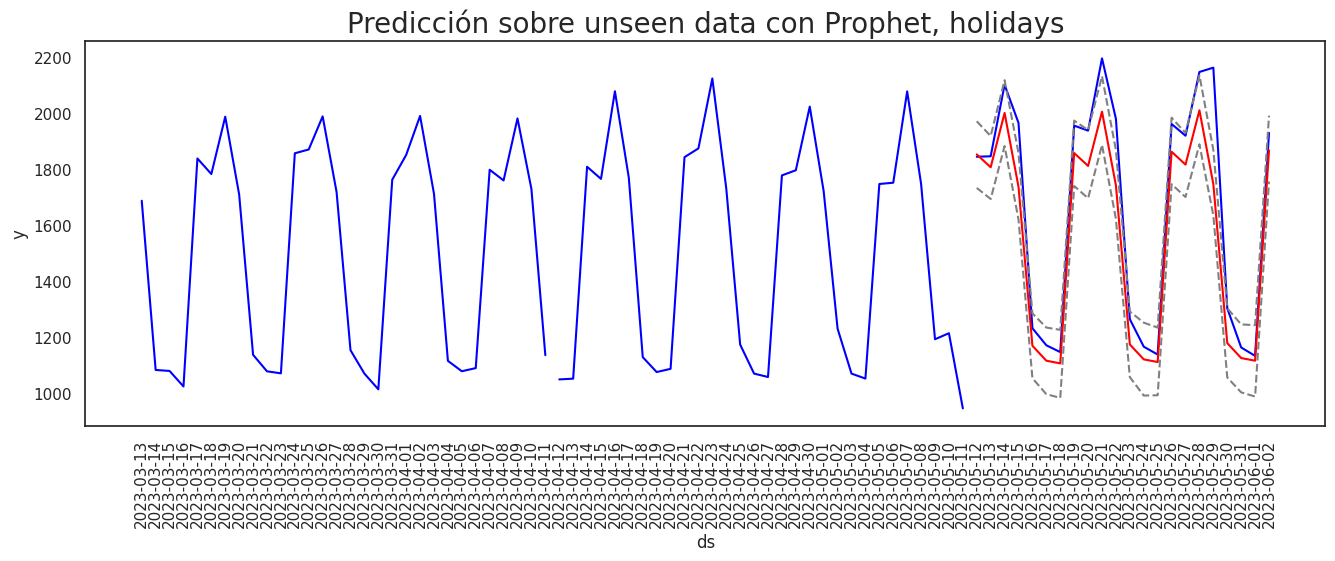

In [149]:
sns.set(style='white')
plt.figure(figsize=(16,5))
ax=sns.lineplot(x=train_data_pr['ds'].iloc[len(train_data_pr)-30:],y=train_data_pr["y"].iloc[len(train_data_pr)-30:],color='blue')
ax=sns.lineplot(x=val_data_pr['FECHA'],y=val_data_pr["y"],color='blue')
ax=sns.lineplot(x=df_test_pr['FECHA'],y=df_test_pr["y"],color='blue')
ax=sns.lineplot(x=df_test_pr['FECHA'],y=df_test_pr["Prophet_Predictions"],color='red');
ax=sns.lineplot(x=df_test_pr['FECHA'],y=df_test_pr["lower"],color='gray',linestyle='dashed');
ax=sns.lineplot(x=df_test_pr['FECHA'],y=df_test_pr["upper"],color='gray',linestyle='dashed');
#plt.grid(linestyle='-',linewidth=0.3)
ax.tick_params(axis='x', rotation=90)
plt.title("Predicción sobre unseen data con Prophet, holidays", fontsize=20);
plt.show()

In [146]:
df_actual=df_test_pr["y"]

In [147]:
se = np.square(df_test_pr.loc[:, 'Prophet_Predictions'] - df_actual)
mse = np.mean(se)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

RMSE : 140.58964932316684
